<a href="https://colab.research.google.com/github/juneilsam/PUBG/blob/main/PUBG_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

1. 대상 : 2018-10 시즌의 모든 SOLO 플레이 데이터

2. 목적 : PLAYERUNKNOWN'SBATTLEGROUND의 로그 데이터 분석을 통해, 데이터에서 관찰할 수 있는 현상들을 파악해보고자 한다.

  - 로그 데이터 내에 포함되어있는 데이터들의 종류

  - 플레이어의 행동 양상

  - 이상치의 존재

# 프로젝트 순서

1. 준비하기

2. 데이터 엔지니어링

3. 탐색적 데이터 분석

4. 정리

## 1. 준비하기

1-1. 필요한 라이브러리, 모듈 불러오기

1-2. 사용할 파일 정보 확인하기

1-3. 사용할 데이터 셋(csv 파일) 불러오기

### 1-1. 필요한 라이브러리, 모듈 불러오기

In [ ]:
# For autoreloading modules : 자동으로 재실행하고 코드를 실행하게 하기 위함
%load_ext autoreload
%autoreload 2
# For notebook plotting  : plt.show()를 안해도 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline

# Visualization
import matplotlib as mpl # 그래프를 그리기 위함
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns # 좀 더 감각적인 그래프를 그리기 위함
from IPython.display import display # 그래프 등 한 셀안에서 모두 불러올 수 있도록
import warnings # 불필요한 경고문 삭제
warnings.filterwarnings(action='ignore')

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# Standard libraries
import os # - 파일 복사 기능 - 디렉토리 생성 기능 - 특정 디렉토리 내 파일 목록 확인 등
pd.options.display.float_format = '{:.2f}'.format
import missingno as msno
from tqdm import tqdm
import math
import csv                              # csv 파일 읽기 위함
import pandas as pd                     # dataframe 가공
import numpy as np                      # data 분석 도구
from google.colab import drive          # colab에서 외부 파일을 다루기 위함
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1-2. 사용할 파일 정보 확인하기

In [ ]:
# 경로
DIR = '/content/drive/MyDrive/PUBG/PUBG_API/'

# 파일 정보
filename = os.listdir(DIR)

# 데이터셋 정보
print(f'파일 정보 : \n{filename}\n')

print('\n파일 크기 : ')
for file in filename:
    print('{}| {} MB'.format(file.ljust(30), str(round(os.path.getsize(DIR + file) / 1000000, 2))))

파일 정보 : 
['pubg_data.csv']


파일 크기 : 
pubg_data.csv                 | 270.23 MB


### 1-3. 사용할 데이터 셋(csv 파일) 불러오기

In [ ]:
df = pd.read_csv(DIR + filename[0], encoding = 'cp949')

## 2. 데이터 엔지니어링

2-1. 데이터셋 정보 확인하기

2-2. 결측치 확인하기

2-3. 결측치 대체

2-4. 플레이어 유형별 데이터 프레임 구분

2-5. 데이터 프레임 통합

2-6. 새로운 데이터 저장

### 2-1. 데이터셋 정보 확인하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078356 entries, 0 to 2078355
Data columns (total 24 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   DBNOs            int64  
 2   assists          int64  
 3   boosts           int64  
 4   damageDealt      float64
 5   deathType        object 
 6   headshotKills    int64  
 7   heals            int64  
 8   killPlace        int64  
 9   killStreaks      int64  
 10  kills            int64  
 11  longestKill      float64
 12  name             object 
 13  playerId         object 
 14  revives          int64  
 15  rideDistance     float64
 16  roadKills        int64  
 17  swimDistance     float64
 18  teamKills        int64  
 19  timeSurvived     float64
 20  vehicleDestroys  int64  
 21  walkDistance     float64
 22  weaponsAcquired  int64  
 23  winPlace         int64  
dtypes: float64(6), int64(15), object(3)
memory usage: 380.6+ MB


 **컬럼 설명**
 
 0.   Unnamed: 0       (int64)  : 무의미한 삭제 대상 컬럼(csv 파일 저장시 index가 포함된 것으로 보임)

 1.   DBNOs            (int64)  : 마주친 플레이어 수

 2.   assists          (int64)  : 어시스트 수
 
 3.   boosts           (int64)  : 부스트 아이템 사용 횟수
 
 4.   damageDealt      (float64) : 가한 피해 딜량
 
 5.   deathType        (object) : 사망 유형
 
 6.   headshotKills    (int64)  : 헤드샷 킬 수
 
 7.   heals            (int64)  : 회복 아이템 사용 수
 
 8.   killPlace        (int64)  : 킬 수에 따른 해당 플레이어의 순위
 
 9.   killStreaks      (int64)  : 연속 킬 수
 
 10.  kills            (int64)  : 킬 수
 
 11.  longestKill      (float64) : 플레이어와 살해당한 플레이어가 죽었을 때의 최장 길이(익사하거나 멀리 운전해 간 경우 큰 수치가 나올 수 있다)
 
 12.  name             (object) : 플레이어의 닉네임
 
 13.  playerId         (object) : 플레이어의 고유 아이디 
 
 14.  revives          (int64)  : 이 플레이어가 동료를 되살린 횟수
 
 15.  rideDistance     (float64) : meter로 측정된 운송수단을 타고 이동한 총 거리
 
 16.  roadKills        (int64)  : 운송수단 안에 있는 동안의 킬 수
 
 17.  swimDistance     (float64) : meter로 측정된 수영으로 이동한 총 거리
 
 18.  teamKills        (int64)  : 팀킬 횟수
 
 19.  timeSurvived     (float64) : 게임에서 생존한 시간
 
 20.  vehicleDestroys  (int64)  : 운송수단 파괴 횟수
 
 21.  walkDistance     (float64) : meter로 측정된 걸어서 이동한 총 거리
 
 22.  weaponsAcquired  (int64)  : 무기를 주운 횟수
 
 23.  winPlace         (int64)  : 게임에서 해당 플레이어의 순위

In [ ]:
# 무의미한 컬럼 삭제 (이전 index와 불필요한 플레이어 개인정보)
df.drop(['Unnamed: 0', 'name'], axis = 1, inplace=True)

In [ ]:
# 데이터셋 상위 5줄
print('데이터 상위 5줄 : ')
display(df.head())

# 데이터셋 하위 5줄
print('\n데이터 하위 5줄 : ')
display(df.tail())

# 데이터셋 세부 정보
print('\n데이터셋 세부 정보 : ')
display(df.describe())

데이터 상위 5줄 : 


,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,longestKill,playerId,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
0,1,0,4,135.53,byplayer,0,6,29,1,1,226.55,account.4593b4068b5749a98879324cf8773526,0,891.21,0,0.00,0,789.13,0,980.74,6,18
1,0,0,0,0.00,byplayer,0,0,80,0,0,0.00,ai.337,0,0.00,0,0.00,0,310.70,0,813.81,1,23
2,0,0,1,0.00,byplayer,0,1,57,0,0,0.00,account.2dee93cf68024d2d95f7082ce34c454f,0,6463.32,0,0.00,0,1251.65,0,1117.09,5,15
3,0,0,0,64.26,byplayer,0,0,97,0,0,0.00,account.431542c110064e03a323f59d6ff4c8e1,0,0.00,0,0.00,0,157.66,0,81.52,2,28
4,0,0,0,0.00,byplayer,0,0,64,0,0,0.00,ai.345,0,0.00,0,0.00,0,318.23,0,1231.92,2,17



데이터 하위 5줄 : 


,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,longestKill,playerId,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
2078351,1,0,2,100.00,byplayer,0,4,24,1,1,41.63,account.413e3424d40a417ea6f3bc2384fa8830,0,2889.56,0,0.00,0,1031.25,0,1899.99,3,9
2078352,4,2,7,783.50,byplayer,1,4,1,2,7,241.09,account.5f5ac73696f545bdb087f17b3e52bdaf,0,0.00,0,0.00,0,1506.97,0,2767.26,3,1
2078353,0,0,5,58.31,byplayer,0,3,41,0,0,0.00,account.ea303f8505ec44029a4a96fe9f844277,0,0.00,0,0.00,0,983.57,0,2717.07,5,10
2078354,0,2,4,237.85,byplayer,0,0,33,0,0,0.00,account.e275f24dd98c4d9f9ce177d85b18d4ff,0,0.00,0,9.63,0,1190.73,0,3271.99,2,4
2078355,0,0,0,0.00,byplayer,0,0,35,0,0,0.00,account.b12c0da36f174323a6ff3f928742dce3,0,0.00,0,0.00,0,665.92,0,1696.94,4,6



데이터셋 세부 정보 : 


,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
count,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00,2078356.00
mean,0.52,0.19,2.55,144.71,0.26,1.58,37.89,0.50,0.95,30.59,0.14,1475.10,0.01,11.18,0.00,782.30,0.02,1062.50,4.29,21.78
std,1.15,0.57,3.13,216.95,0.69,2.90,24.61,0.66,1.75,64.64,0.46,2150.63,0.10,128.52,0.08,507.73,0.15,971.78,3.58,19.51
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,321.55,0.00,232.24,2.00,8.00
50%,0.00,0.00,1.00,83.39,0.00,0.00,36.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,735.98,0.00,909.77,4.00,15.00
75%,1.00,0.00,4.00,200.00,0.00,2.00,55.00,1.00,1.00,28.25,0.00,2641.85,0.00,0.00,0.00,1167.27,0.00,1633.26,6.00,30.00
max,60.00,17.00,35.00,10471.70,45.00,74.00,153.00,24.00,77.00,996.55,61.00,29923.35,17.00,53958.12,22.00,3255.76,24.00,85604.51,469.00,100.00


### 2-2. 결측치 확인하기

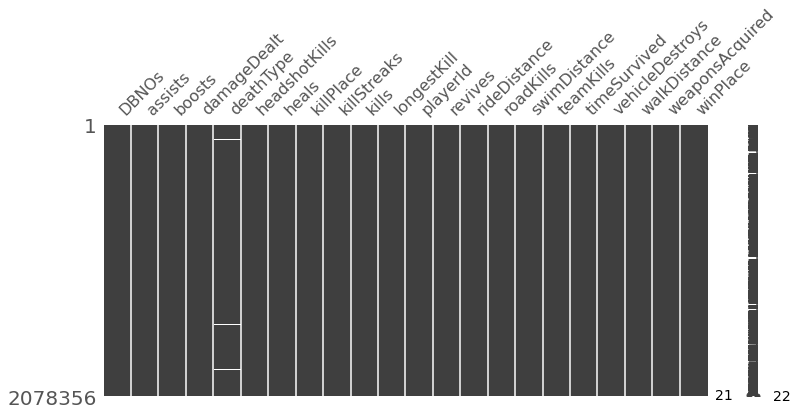

In [ ]:
# missingno를 활용한 결측치 확인
msno.matrix(df, figsize=(12,5))

In [ ]:
# numpy 함수를 이용한 결측치 확인
df.isnull().sum()

DBNOs                 0
assists               0
boosts                0
damageDealt           0
deathType          8005
headshotKills         0
heals                 0
killPlace             0
killStreaks           0
kills                 0
longestKill           0
playerId              0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
timeSurvived          0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPlace              0
dtype: int64

'deathType'에만 null값이 있다는 것을 알 수 있다.

In [ ]:
# null값을 가진 데이터 출력
df[df['deathType'].isnull()]

,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,longestKill,playerId,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
3542,0,0,0,42.90,NaN,0,0,51,0,0,0.00,npc.269,0,0.00,0,0.00,0,0.00,0,0.00,0,17
3559,0,0,0,0.00,NaN,0,0,48,0,0,0.00,npc.274,0,0.00,0,0.00,0,0.00,0,0.00,0,16
3561,0,0,0,0.00,NaN,0,0,44,0,0,0.00,npc.268,0,0.00,0,0.00,0,0.00,0,0.00,0,16
3565,0,0,0,68.35,NaN,0,0,46,0,0,0.00,npc.272,0,0.00,0,0.00,0,0.00,0,0.00,0,16
3566,0,0,0,42.24,NaN,0,0,49,0,0,0.00,npc.270,0,0.00,0,0.00,0,0.00,0,0.00,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069034,0,0,0,21.45,NaN,0,0,46,0,0,0.00,npc.258,0,0.00,0,0.00,0,0.00,0,0.00,0,9
2069036,1,0,0,55.36,NaN,0,0,48,0,0,0.00,npc.256,0,0.00,0,0.00,0,0.00,0,0.00,0,10
2069038,0,0,0,68.85,NaN,0,0,44,0,0,0.00,npc.275,0,0.00,0,0.00,0,0.00,0,0.00,0,9
2069040,0,0,0,21.45,NaN,0,0,45,0,0,0.00,npc.272,0,0.00,0,0.00,0,0.00,0,0.00,0,9


'playerId'가 'npc.'으로 시작하는 것으로 보아, NPC들이 null값을 가진 것으로 추측된다.

In [ ]:
# deathType 컬럼의 고유값 확인
df['deathType'].unique()

array(['byplayer', 'byzone', 'alive', 'suicide', 'logout', nan],
      dtype=object)

In [ ]:
print(sorted(df[df['deathType'].isnull()]['playerId'].unique()))
print('null값을 가진 플레이어의 수 : ', len(df[df['deathType'].isnull()]['playerId'].unique()))

['npc.256', 'npc.257', 'npc.258', 'npc.259', 'npc.260', 'npc.261', 'npc.262', 'npc.263', 'npc.264', 'npc.265', 'npc.266', 'npc.267', 'npc.268', 'npc.269', 'npc.270', 'npc.271', 'npc.272', 'npc.273', 'npc.274', 'npc.275']
null값을 가진 플레이어의 수 :  20


null값을 가진 플레이어가 모두 NPC이며, 총 20명의 NPC가 기록되었다.

In [ ]:
df[df['deathType'].isnull()].describe()

,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
count,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00,8005.00
mean,0.19,0.01,0.00,32.33,0.00,0.00,38.84,0.06,0.07,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.37
std,0.49,0.12,0.00,50.02,0.06,0.00,9.27,0.30,0.31,1.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.29
min,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,35.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00
75%,0.00,0.00,0.00,50.70,0.00,0.00,46.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00
max,9.00,3.00,0.00,478.04,2.00,0.00,54.00,4.00,4.00,37.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.00


NPC들은 대부분의 활동 로그가 없고, kill과 관련된 로그에만 기록을 보이고 있다.

### 2-3. 결측치 대체

null값을 'unknown'으로 대체

In [ ]:
print('이전 : ', df.deathType.unique())
df.deathType = df.deathType.fillna('unknown')
print('이후 : ', df.deathType.unique())

이전 :  ['byplayer' 'byzone' 'alive' 'suicide' 'logout' nan]
이후 :  ['byplayer' 'byzone' 'alive' 'suicide' 'logout' 'unknown']


### 2-4. 플레이어 유형별 데이터프레임 구분

**NPC 데이터 프레임**

In [ ]:
# NPC 데이터프레임 생성
df_npc = df[df['playerId'].str.contains('npc.')]
display(df_npc)

,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,longestKill,playerId,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
3533,0,0,0,0.00,alive,0,0,23,0,0,0.00,npc.259,0,0.00,0,0.00,0,960.51,0,0.00,0,1
3537,0,0,0,0.00,alive,0,0,20,0,0,0.00,npc.257,0,0.00,0,0.00,0,960.51,0,0.00,0,1
3541,0,0,0,0.00,alive,0,0,14,0,0,0.00,npc.260,0,0.00,0,0.00,0,960.51,0,0.00,0,1
3542,0,0,0,42.90,unknown,0,0,51,0,0,0.00,npc.269,0,0.00,0,0.00,0,0.00,0,0.00,0,17
3546,0,0,0,0.00,alive,0,0,21,0,0,0.00,npc.256,0,0.00,0,0.00,0,960.51,0,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069038,0,0,0,68.85,unknown,0,0,44,0,0,0.00,npc.275,0,0.00,0,0.00,0,0.00,0,0.00,0,9
2069040,0,0,0,21.45,unknown,0,0,45,0,0,0.00,npc.272,0,0.00,0,0.00,0,0.00,0,0.00,0,9
2069041,0,0,0,20.05,unknown,0,0,43,0,0,0.00,npc.274,0,0.00,0,0.00,0,0.00,0,0.00,0,9
2069044,0,0,0,0.00,alive,0,0,17,0,0,0.00,npc.262,0,0.00,0,0.00,0,936.12,0,0.00,0,1


In [ ]:
df_npc.describe()

,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
count,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00
mean,0.16,0.01,0.00,25.99,0.00,0.00,32.20,0.09,0.09,0.32,0.00,0.00,0.00,0.00,0.00,272.33,0.00,0.00,0.00,8.22
std,0.44,0.10,0.00,47.60,0.07,0.00,12.99,0.35,0.37,1.84,0.00,0.00,0.00,0.00,0.00,415.59,0.00,0.00,0.00,5.50
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,36.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00
75%,0.00,0.00,0.00,38.22,0.00,0.00,44.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,814.20,0.00,0.00,0.00,12.00
max,9.00,3.00,0.00,478.04,2.00,0.00,54.00,4.00,4.00,37.82,0.00,0.00,0.00,0.00,0.00,1101.76,0.00,0.00,0.00,21.00


In [ ]:
npc_list = sorted(df_npc['playerId'].unique())
npc_index = df_npc.index.values
print(npc_list)
print('npc의 수 : ', len(npc_list))
print('npc의 참여 횟수 : ', len(npc_index))

['npc.256', 'npc.257', 'npc.258', 'npc.259', 'npc.260', 'npc.261', 'npc.262', 'npc.263', 'npc.264', 'npc.265', 'npc.266', 'npc.267', 'npc.268', 'npc.269', 'npc.270', 'npc.271', 'npc.272', 'npc.273', 'npc.274', 'npc.275']
npc의 수 :  20
npc의 참여 횟수 :  11500


**AI 데이터프레임**

In [ ]:
# AI의 데이터프레임 생성
df_ai = df[df['playerId'].str.contains('ai.')]
display(df_ai)

,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,longestKill,playerId,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
1,0,0,0,0.00,byplayer,0,0,80,0,0,0.00,ai.337,0,0.00,0,0.00,0,310.70,0,813.81,1,23
4,0,0,0,0.00,byplayer,0,0,64,0,0,0.00,ai.345,0,0.00,0,0.00,0,318.23,0,1231.92,2,17
5,0,0,0,166.30,byplayer,0,0,27,1,1,0.00,ai.347,0,0.00,0,0.00,0,879.66,0,2489.20,4,17
24,0,0,0,0.00,byplayer,0,0,71,0,0,0.00,ai.332,0,0.00,0,0.00,0,278.92,0,915.63,1,20
25,0,0,0,0.00,byplayer,0,0,73,0,0,0.00,ai.330,0,0.00,0,0.00,0,512.75,0,1394.40,3,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078156,0,0,0,0.00,byzone,0,0,65,0,0,0.00,ai.344,0,0.00,0,0.00,0,1083.63,0,2551.59,1,8
2078161,0,0,0,0.00,byplayer,0,0,89,0,0,0.00,ai.337,0,0.00,0,0.00,0,125.10,0,93.96,1,17
2078162,1,0,0,100.00,byplayer,0,0,29,1,1,1.56,ai.338,0,0.00,0,0.00,0,470.36,0,543.17,2,17
2078163,0,0,0,0.00,byplayer,0,0,68,0,0,0.00,ai.342,0,0.00,0,0.00,0,438.47,0,1804.38,1,9


In [ ]:
ai_list = sorted(df_ai['playerId'].unique())
ai_index = df_ai.index.values
print(ai_list)
print('ai의 수 : ', len(ai_list))
print('ai의 참여 횟수 : ', len(ai_index))

['ai.256', 'ai.257', 'ai.258', 'ai.259', 'ai.260', 'ai.261', 'ai.262', 'ai.263', 'ai.264', 'ai.265', 'ai.266', 'ai.267', 'ai.268', 'ai.269', 'ai.270', 'ai.271', 'ai.272', 'ai.273', 'ai.274', 'ai.275', 'ai.276', 'ai.277', 'ai.278', 'ai.279', 'ai.280', 'ai.281', 'ai.282', 'ai.283', 'ai.284', 'ai.285', 'ai.286', 'ai.287', 'ai.288', 'ai.289', 'ai.290', 'ai.291', 'ai.292', 'ai.293', 'ai.294', 'ai.295', 'ai.296', 'ai.297', 'ai.298', 'ai.299', 'ai.300', 'ai.301', 'ai.302', 'ai.303', 'ai.304', 'ai.305', 'ai.306', 'ai.307', 'ai.308', 'ai.309', 'ai.310', 'ai.311', 'ai.312', 'ai.313', 'ai.314', 'ai.315', 'ai.316', 'ai.317', 'ai.318', 'ai.319', 'ai.320', 'ai.321', 'ai.322', 'ai.323', 'ai.324', 'ai.325', 'ai.326', 'ai.327', 'ai.328', 'ai.329', 'ai.330', 'ai.331', 'ai.332', 'ai.333', 'ai.334', 'ai.335', 'ai.336', 'ai.337', 'ai.338', 'ai.339', 'ai.340', 'ai.341', 'ai.342', 'ai.343', 'ai.344', 'ai.345', 'ai.346', 'ai.347', 'ai.348', 'ai.349', 'ai.350', 'ai.351', 'ai.352', 'ai.353', 'ai.354', 'ai.355',

**PLAYER 데이터프레임**

In [ ]:
# PLAYER 데이터 프레임 생성
# df_player = df.drop(npc_index & ai_index)
df_player = df.drop(npc_index)
df_player = df_player.drop(ai_index)
df_player

,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,longestKill,playerId,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
0,1,0,4,135.53,byplayer,0,6,29,1,1,226.55,account.4593b4068b5749a98879324cf8773526,0,891.21,0,0.00,0,789.13,0,980.74,6,18
2,0,0,1,0.00,byplayer,0,1,57,0,0,0.00,account.2dee93cf68024d2d95f7082ce34c454f,0,6463.32,0,0.00,0,1251.65,0,1117.09,5,15
3,0,0,0,64.26,byplayer,0,0,97,0,0,0.00,account.431542c110064e03a323f59d6ff4c8e1,0,0.00,0,0.00,0,157.66,0,81.52,2,28
6,1,0,4,187.78,byzone,0,7,49,0,0,0.00,account.6ae5b6e1e2bc4b7c9596d01980578f67,0,4200.78,0,0.00,0,1411.52,0,1745.90,5,12
7,2,0,1,200.00,byplayer,2,6,19,1,2,6.98,account.edd3270d041843239a81786ffbe4ea9c,0,0.00,0,0.00,0,327.42,0,335.00,6,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078351,1,0,2,100.00,byplayer,0,4,24,1,1,41.63,account.413e3424d40a417ea6f3bc2384fa8830,0,2889.56,0,0.00,0,1031.25,0,1899.99,3,9
2078352,4,2,7,783.50,byplayer,1,4,1,2,7,241.09,account.5f5ac73696f545bdb087f17b3e52bdaf,0,0.00,0,0.00,0,1506.97,0,2767.26,3,1
2078353,0,0,5,58.31,byplayer,0,3,41,0,0,0.00,account.ea303f8505ec44029a4a96fe9f844277,0,0.00,0,0.00,0,983.57,0,2717.07,5,10
2078354,0,2,4,237.85,byplayer,0,0,33,0,0,0.00,account.e275f24dd98c4d9f9ce177d85b18d4ff,0,0.00,0,9.63,0,1190.73,0,3271.99,2,4


In [ ]:
player_list = df_player.playerId.unique()
player_index = df_player.index.values
print('player의 수 : ', len(player_list))
print('player의 참여 횟수 : ', len(player_index))

player의 수 :  817778
player의 참여 횟수 :  1829990


In [ ]:
# 너무 오랜 시간이 소요되어 사용하지 않은 방법
# 각각 분리된 데이터 프레임의 인덱스를 추출하고 그 인덱스에 맞춰 값을 삽입
"""
for i in tqdm(df_npc.index.values):
  df.loc[i, 'npc'] = 1
  df.loc[i, 'ctrl'] = 'npc'

for i in tqdm(df_ai.index.values):
  df.loc[i, 'ai'] = 1
  df.loc[i, 'ctrl'] = 'ai'

df.npc = df.npc.fillna(0)
df.ai = df.ai.fillna(0)

df_npc = df[df['npc'] == 1]
df_ai = df[df['ai'] == 1]
df_player = df[(df['npc'] + df['ai']) == 0]

"""

"\nfor i in tqdm(df_npc.index.values):\n  df.loc[i, 'npc'] = 1\n  df.loc[i, 'ctrl'] = 'npc'\n\nfor i in tqdm(df_ai.index.values):\n  df.loc[i, 'ai'] = 1\n  df.loc[i, 'ctrl'] = 'ai'\n\ndf.npc = df.npc.fillna(0)\ndf.ai = df.ai.fillna(0)\n\ndf_npc = df[df['npc'] == 1]\ndf_ai = df[df['ai'] == 1]\ndf_player = df[(df['npc'] + df['ai']) == 0]\n\n"

**새 기준에 맞추어 데이터프레임 구분**

In [ ]:
# 각각의 데이터 프레임 재정의
df_npc['ctrl'] = 'npc'
df_ai['ctrl'] = 'ai'
df_player['ctrl'] = 'player'

**플레이어 유형 원-핫 인코딩**
- 머신러닝이나 딥러닝, 기타 다른 방법으로 데이터를 학습 시키고 분석할 때, 유용하게 사용될 수 있다.

In [ ]:
df_npc['player'] = 0
df_ai['player'] = 0
df_player['player'] = 1

In [ ]:
df_npc['npc'] = 1
df_ai['npc'] = 0
df_player['npc'] = 0

In [ ]:
df_npc['ai'] = 0
df_ai['ai'] = 1
df_player['ai'] = 0

### 2-5. 데이터프레임 통합

In [ ]:
# 분리되어있던 데이터 프레임들을 합쳐 전체 크기로 만듦
df1 = pd.concat([df_player, df_npc, df_ai])

In [ ]:
# 기존 인덱스에 맞추어 재정렬
df1 = df1.sort_index()

In [ ]:
df1.columns

Index(['DBNOs', 'assists', 'boosts', 'damageDealt', 'deathType',
       'headshotKills', 'heals', 'killPlace', 'killStreaks', 'kills',
       'longestKill', 'playerId', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'timeSurvived', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPlace', 'ctrl', 'player', 'npc',
       'ai'],
      dtype='object')

In [ ]:
# 컬럼 순서 재배치
df1 = df1[['playerId', 'ctrl', 'deathType', 'player', 'npc', 'ai', 'DBNOs', 'assists', 'boosts', 'damageDealt', 
           'headshotKills', 'heals', 'killPlace', 'killStreaks', 'kills', 'longestKill', 'revives',
           'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'timeSurvived', 'vehicleDestroys',
           'walkDistance', 'weaponsAcquired', 'winPlace']]

In [ ]:
df1

,playerId,ctrl,deathType,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
0,account.4593b4068b5749a98879324cf8773526,player,byplayer,1,0,0,1,0,4,135.53,0,6,29,1,1,226.55,0,891.21,0,0.00,0,789.13,0,980.74,6,18
1,ai.337,ai,byplayer,0,0,1,0,0,0,0.00,0,0,80,0,0,0.00,0,0.00,0,0.00,0,310.70,0,813.81,1,23
2,account.2dee93cf68024d2d95f7082ce34c454f,player,byplayer,1,0,0,0,0,1,0.00,0,1,57,0,0,0.00,0,6463.32,0,0.00,0,1251.65,0,1117.09,5,15
3,account.431542c110064e03a323f59d6ff4c8e1,player,byplayer,1,0,0,0,0,0,64.26,0,0,97,0,0,0.00,0,0.00,0,0.00,0,157.66,0,81.52,2,28
4,ai.345,ai,byplayer,0,0,1,0,0,0,0.00,0,0,64,0,0,0.00,0,0.00,0,0.00,0,318.23,0,1231.92,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078351,account.413e3424d40a417ea6f3bc2384fa8830,player,byplayer,1,0,0,1,0,2,100.00,0,4,24,1,1,41.63,0,2889.56,0,0.00,0,1031.25,0,1899.99,3,9
2078352,account.5f5ac73696f545bdb087f17b3e52bdaf,player,byplayer,1,0,0,4,2,7,783.50,1,4,1,2,7,241.09,0,0.00,0,0.00,0,1506.97,0,2767.26,3,1
2078353,account.ea303f8505ec44029a4a96fe9f844277,player,byplayer,1,0,0,0,0,5,58.31,0,3,41,0,0,0.00,0,0.00,0,0.00,0,983.57,0,2717.07,5,10
2078354,account.e275f24dd98c4d9f9ce177d85b18d4ff,player,byplayer,1,0,0,0,2,4,237.85,0,0,33,0,0,0.00,0,0.00,0,9.63,0,1190.73,0,3271.99,2,4


### 2-6. 새로운 데이터 저장

In [ ]:
# 새로운 데이터 프레임을 csv 파일로 저장
df1.to_csv(DIR + 'pubg_data_added.csv', index = False)

## 3. 탐색적 데이터 분석

3-1. 사용할 파일 정보 확인하기

3-2. 사용할 데이터셋(csv 파일) 불러오기

3-3. 데이터셋 정보 확인하기

3-4. 데이터 프레임 분리하기

3-5. 카테고리 데이터 분석

3-6. 피쳐 간 상관계수 분석

3-7. 이상치 확인하기

3-8. 킬 수에 따른 데이터 분석

### 3-1. 사용할 파일 정보 확인하기

In [ ]:
# 파일 정보
filename = os.listdir(DIR)

# 데이터셋 정보
print(f'파일 정보 : \n{filename}\n')

print('\n파일 크기 : ')
for file in filename:
    print('{}| {} MB'.format(file.ljust(30), str(round(os.path.getsize(DIR + file) / 1000000, 2))))

파일 정보 : 
['pubg_data.csv', 'pubg_data_added.csv']


파일 크기 : 
pubg_data.csv                 | 270.23 MB
pubg_data_added.csv           | 282.39 MB


### 3-2. 사용할 데이터셋(csv 파일) 불러오기

In [ ]:
df1 = pd.read_csv(DIR + filename[1], encoding = 'cp949')

### 3-3. 데이터셋 정보 확인하기

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078356 entries, 0 to 2078355
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   playerId         object 
 1   ctrl             object 
 2   deathType        object 
 3   player           int64  
 4   npc              int64  
 5   ai               int64  
 6   DBNOs            int64  
 7   assists          int64  
 8   boosts           int64  
 9   damageDealt      float64
 10  headshotKills    int64  
 11  heals            int64  
 12  killPlace        int64  
 13  killStreaks      int64  
 14  kills            int64  
 15  longestKill      float64
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  timeSurvived     float64
 22  vehicleDestroys  int64  
 23  walkDistance     float64
 24  weaponsAcquired  int64  
 25  winPlace         int64  
dtypes: float64(6), int64(17), object(3)
memory

In [ ]:
display(df1.head())
display(df1.tail())

,playerId,ctrl,deathType,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
0,account.4593b4068b5749a98879324cf8773526,player,byplayer,1,0,0,1,0,4,135.53,0,6,29,1,1,226.55,0,891.21,0,0.00,0,789.13,0,980.74,6,18
1,ai.337,ai,byplayer,0,0,1,0,0,0,0.00,0,0,80,0,0,0.00,0,0.00,0,0.00,0,310.70,0,813.81,1,23
2,account.2dee93cf68024d2d95f7082ce34c454f,player,byplayer,1,0,0,0,0,1,0.00,0,1,57,0,0,0.00,0,6463.32,0,0.00,0,1251.65,0,1117.09,5,15
3,account.431542c110064e03a323f59d6ff4c8e1,player,byplayer,1,0,0,0,0,0,64.26,0,0,97,0,0,0.00,0,0.00,0,0.00,0,157.66,0,81.52,2,28
4,ai.345,ai,byplayer,0,0,1,0,0,0,0.00,0,0,64,0,0,0.00,0,0.00,0,0.00,0,318.23,0,1231.92,2,17


,playerId,ctrl,deathType,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
2078351,account.413e3424d40a417ea6f3bc2384fa8830,player,byplayer,1,0,0,1,0,2,100.00,0,4,24,1,1,41.63,0,2889.56,0,0.00,0,1031.25,0,1899.99,3,9
2078352,account.5f5ac73696f545bdb087f17b3e52bdaf,player,byplayer,1,0,0,4,2,7,783.50,1,4,1,2,7,241.09,0,0.00,0,0.00,0,1506.97,0,2767.26,3,1
2078353,account.ea303f8505ec44029a4a96fe9f844277,player,byplayer,1,0,0,0,0,5,58.31,0,3,41,0,0,0.00,0,0.00,0,0.00,0,983.57,0,2717.07,5,10
2078354,account.e275f24dd98c4d9f9ce177d85b18d4ff,player,byplayer,1,0,0,0,2,4,237.85,0,0,33,0,0,0.00,0,0.00,0,9.63,0,1190.73,0,3271.99,2,4
2078355,account.b12c0da36f174323a6ff3f928742dce3,player,byplayer,1,0,0,0,0,0,0.00,0,0,35,0,0,0.00,0,0.00,0,0.00,0,665.92,0,1696.94,4,6


### 3-4. 데이터 프레임 분리하기

**엔지니어링한 피쳐를 기준으로 분리된 데이터 프레임 생성하기**

In [ ]:
# 플레이어 유형별 카테고리화
df1.ctrl = df1.ctrl.astype('category')
df1.ctrl.cat.set_categories(df1.ctrl.values.unique(), inplace=True)

In [ ]:
# 원-핫 인코딩으로 생성한 피쳐 기준
df1_npc = df1[df1['npc'] == 1]
df1_ai = df1[df1['ai'] == 1]
df1_player = df1[df1['player'] == 1]

**각 데이터 정보 확인**

In [ ]:
print('플레이어 유형별 평균')
display(pd.pivot_table(df1, index = 'ctrl', values=df1.columns[6:], aggfunc='mean', margins=True))
print('\n\n플레이어 유형별 최솟값')
display(pd.pivot_table(df1, index = 'ctrl', values=df1.columns[6:], aggfunc='min', margins=True))
print('\n\n플레이어 유형별 최댓값')
display(pd.pivot_table(df1, index = 'ctrl', values=df1.columns[6:], aggfunc='max', margins=True))

플레이어 유형별 평균


,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
ctrl,,,,,,,,,,,,,,,,,,,,
player,0.57,0.22,2.89,160.60,0.30,1.79,35.25,0.54,1.04,34.55,0.16,1675.30,0.01,3.90,0.01,817.57,0.02,1134.44,4.65,20.91
ai,0.10,0.00,0.00,27.69,0.01,0.00,58.51,0.22,0.28,1.47,0.00,0.00,0.00,67.91,0.00,534.60,0.00,558.27,1.75,29.15
npc,0.16,0.01,0.00,25.99,0.00,0.00,32.20,0.09,0.09,0.32,0.00,0.00,0.00,0.00,0.00,272.33,0.00,0.00,0.00,8.22
All,0.52,0.19,2.55,144.71,0.26,1.58,37.89,0.50,0.95,30.59,0.14,1475.10,0.01,11.18,0.00,782.30,0.02,1062.50,4.29,21.78




플레이어 유형별 최솟값


,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
ctrl,,,,,,,,,,,,,,,,,,,,
player,0,0,0,0.00,0,0,1,0,0,0.00,0,0.00,0,0.00,0,0.04,0,0.00,0,0
ai,0,0,0,0.00,0,0,1,0,0,0.00,0,0.00,0,0.00,0,45.46,0,0.00,0,1
npc,0,0,0,0.00,0,0,1,0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,1
All,0,0,0,0.00,0,0,1,0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0




플레이어 유형별 최댓값


,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
ctrl,,,,,,,,,,,,,,,,,,,,
player,60,17,35,10471.70,45,74,153,24,77,996.55,61,29923.35,17,53958.12,22,3255.76,24,85604.51,469,100
ai,4,0,0,683.99,2,0,151,8,9,153.24,0,0.00,0,6473.86,2,1915.13,1,8014.75,8,100
npc,9,3,0,478.04,2,0,54,4,4,37.82,0,0.00,0,0.00,0,1101.76,0,0.00,0,21
All,60,17,35,10471.70,45,74,153,24,77,996.55,61,29923.35,17,53958.12,22,3255.76,24,85604.51,469,100


*** 데이터 분석 순서**

1. 카테고리 데이터 분석

2. 상관계수 분석

3. 이상치 분석

### 3-5. 카테고리 데이터 분석

**각 유형간 사망 유형**

* 실제로는 게임 종료 유형이 더 맞는 듯 함

In [ ]:
print('player의 사망 유형 : ', list(df1_player.deathType.unique()))
print('npc의 사망 유형 : ', list(df1_npc.deathType.unique()))
print('ai의 사망 유형 : ', list(df1_ai.deathType.unique()))
deathTypes = list(df1.deathType.unique())
print('전체 사망 유형 : ', deathTypes)

player의 사망 유형 :  ['byplayer', 'byzone', 'alive', 'suicide', 'logout']
npc의 사망 유형 :  ['alive', 'unknown']
ai의 사망 유형 :  ['byplayer', 'byzone', 'suicide', 'alive']
전체 사망 유형 :  ['byplayer', 'byzone', 'alive', 'suicide', 'logout', 'unknown']


In [ ]:
# 사망유형 카테고리화
df1.deathType = df1.deathType.astype('category')
df1.deathType.cat.set_categories(deathTypes, inplace=True)

In [ ]:
print('deathType, 플레이어 유형별 수')
display(pd.pivot_table(df1, index = 'deathType', values=df1.columns[3:6], aggfunc='sum', margins=True))

deathType, 플레이어 유형별 수


,ai,npc,player
deathType,,,
byplayer,206127,0,1653051
byzone,13394,0,65539
alive,12,3495,56675
suicide,17333,0,34527
logout,0,0,20198
unknown,0,8005,0
All,236866,11500,1829990


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'AI deathType')]

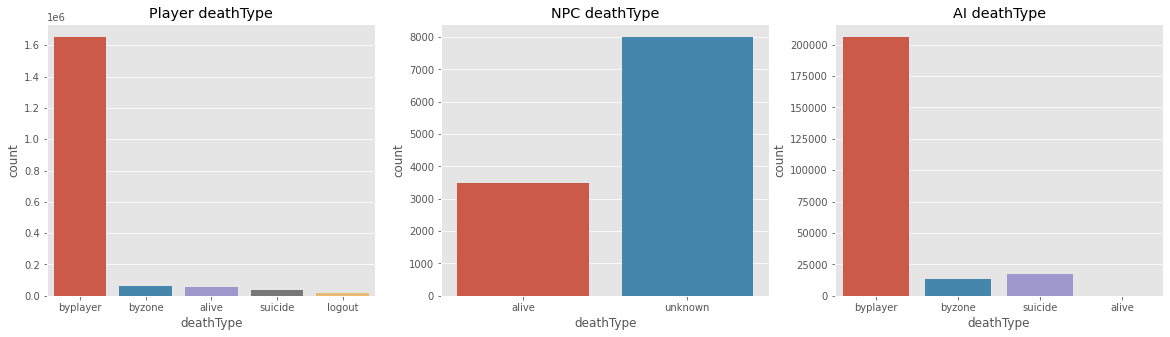

In [ ]:
# 카테고리(사망 유형) 막대 그래프 표현
figure, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
figure.set_size_inches(20, 5)

sns.countplot(data = df1_player, x='deathType', ax=ax1)
sns.countplot(data = df1_npc, x = 'deathType', ax=ax2)
sns.countplot(data = df1_ai, x='deathType', ax=ax3)

ax1.set(ylabel='count', title="Player deathType")
ax2.set(ylabel='count', title="NPC deathType")
ax3.set(ylabel='count', title="AI deathType")

In [ ]:
print('deathType, 플레이어 유형별 평균')
display(pd.pivot_table(df1, index = ['deathType', 'ctrl'], values=df1.columns[6:], aggfunc='mean', margins=True))
print('\n\ndeathType, 플레이어 유형별 최솟값')
display(pd.pivot_table(df1, index = ['deathType', 'ctrl'], values=df1.columns[6:], aggfunc='min', margins=True))
print('\n\ndeathType, 플레이어 유형별 최댓값')
display(pd.pivot_table(df1, index = ['deathType', 'ctrl'], values=df1.columns[6:], aggfunc='max', margins=True))

deathType, 플레이어 유형별 평균


DBNOs  assists  ...  weaponsAcquired  winPlace
deathType ctrl                    ...                           
byplayer  player   0.53     0.19  ...             4.62     21.67
          ai       0.10     0.00  ...             1.86     29.71
byzone    player   0.53     0.18  ...             4.82     17.98
          ai       0.23     0.00  ...             2.25     11.01
alive     player   1.97     1.03  ...             6.05      1.00
          ai       0.25     0.00  ...             3.08      1.00
          npc      0.07     0.00  ...             0.00      1.00
suicide   player   0.66     0.16  ...             4.39     24.42
          ai       0.02     0.00  ...             0.07     36.50
logout    player   0.18     0.08  ...             3.03     17.44
unknown   npc      0.19     0.01  ...             0.00     11.37
All                0.52     0.19  ...             4.29     21.78

[12 rows x 20 columns]



deathType, 플레이어 유형별 최솟값


DBNOs  assists  ...  weaponsAcquired  winPlace
deathType ctrl                    ...                           
byplayer  player      0        0  ...                0         1
          ai          0        0  ...                0         1
byzone    player      0        0  ...                0         0
          ai          0        0  ...                0         1
alive     player      0        0  ...                0         1
          ai          0        0  ...                2         1
          npc         0        0  ...                0         1
suicide   player      0        0  ...                0         1
          ai          0        0  ...                0         2
logout    player      0        0  ...                0         0
unknown   npc         0        0  ...                0         3
All                   0        0  ...                0         0

[12 rows x 20 columns]



deathType, 플레이어 유형별 최댓값


DBNOs  assists  ...  weaponsAcquired  winPlace
deathType ctrl                    ...                           
byplayer  player     39       17  ...              392       100
          ai          4        0  ...                8       100
byzone    player     60        7  ...              260       100
          ai          3        0  ...                7        93
alive     player     37       11  ...              469         1
          ai          1        0  ...                5         1
          npc         3        1  ...                0         1
suicide   player     60        8  ...              213       100
          ai          3        0  ...                6       100
logout    player     20       12  ...              320        20
unknown   npc         9        3  ...                0        21
All                  60       17  ...              469       100

[12 rows x 20 columns]

- 플레이어는

  1. 다른 플레이어에 의해 사망

  2. 자기장(블루존)에 의해 사망

  3. 생존 (사망하지 않은 것)

  4. 자살 (지형지물에 의해, 본인 무기에 의해, 또는 본인 이동수단에 의해 사망 등)

  5. 로그아웃

  순서로 종료 유형이 많다.

- NPC는

  1. 미확인(킬 로그로 남지 않는 사망으로 추측)

  2. 생존

  순서로 종료 유형이 많다.

- AI는

  1. 다른 플레이어에 의해 사망

  2. 자살 (지형지물에 의해, 본인 무기에 의해 사망 등)

  3. 생존

  순서로 종료 유형이 많다.

**참고 : 치킨 먹은(우승한) AI??**

In [ ]:
df1_ai[df1_ai.deathType == 'alive']

,playerId,ctrl,deathType,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
158149,ai.351,ai,alive,0,0,1,0,0,0,0.00,0,0,48,0,0,0.00,0,0.00,0,0.00,0,1119.97,0,0.00,4,1
371395,ai.278,ai,alive,0,0,1,0,0,0,200.00,0,0,9,1,2,0.00,0,0.00,0,0.00,0,1194.38,0,2625.70,3,1
613251,ai.280,ai,alive,0,0,1,0,0,0,572.65,1,0,1,1,7,0.00,0,0.00,0,0.00,0,1610.89,0,0.00,3,1
655290,ai.263,ai,alive,0,0,1,0,0,0,135.36,0,0,8,2,3,0.00,0,0.00,0,3478.84,0,1609.86,0,478.02,2,1
728676,ai.336,ai,alive,0,0,1,0,0,0,175.00,0,0,13,1,2,0.00,0,0.00,0,0.00,0,996.14,0,2052.53,3,1
940840,ai.323,ai,alive,0,0,1,0,0,0,103.00,0,0,15,1,1,0.00,0,0.00,0,0.00,0,1281.48,0,0.00,3,1
1046700,ai.282,ai,alive,0,0,1,1,0,0,393.49,0,0,3,1,4,101.62,0,0.00,0,0.00,0,1915.13,0,2529.64,3,1
1082628,ai.287,ai,alive,0,0,1,0,0,0,194.60,1,0,6,1,4,0.00,0,0.00,0,0.00,0,1504.96,0,0.00,3,1
1121045,ai.299,ai,alive,0,0,1,1,0,0,242.00,0,0,6,1,4,1.52,0,0.00,0,0.00,0,1388.15,0,0.00,3,1
1419322,ai.324,ai,alive,0,0,1,0,0,0,102.00,1,0,10,1,2,0.00,0,0.00,0,0.00,0,1283.08,0,0.00,5,1


DBNOs, longestKill, walkDistance를 보았을 때, 정상적인 게임에서 작동한 AI가 아닌 듯 하다.

### 3-6. 피쳐 간 상관계수 분석

In [ ]:
# 피쳐간 상관계수 계산
corrMatt = df1.corr()

In [ ]:
# 그래프상 상관관계를 나타낼 삼각형 형태(mask)
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

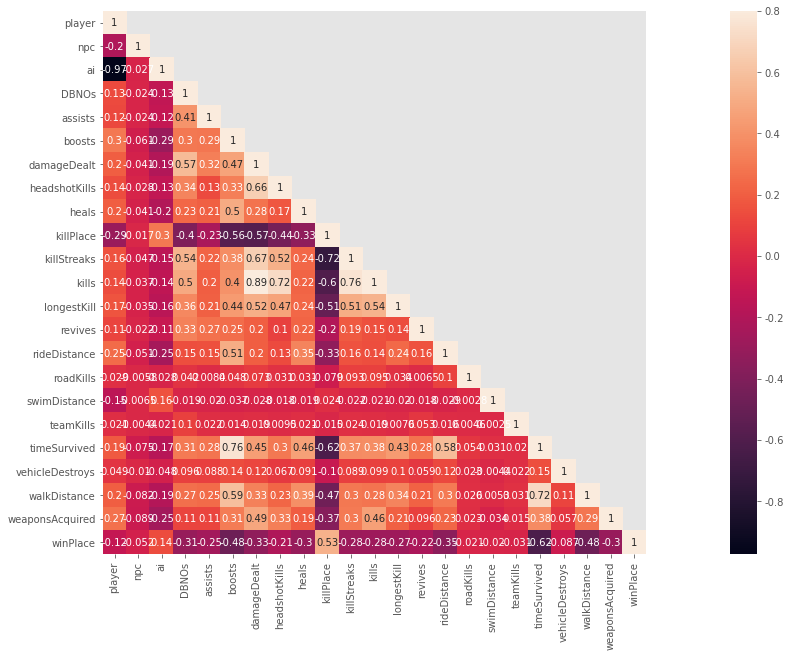

In [ ]:
# 상관계수를 히트맵으로 표현
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

대부분의 피쳐에서 양의 상관관계를 보이고 있고, 음의 상관관계를 보이는 피쳐들이 존재한다.

**상관계수 활용을 위한 함수 생성 및 분석**

In [ ]:
# 상관계수가 0.5 이상인 컬럼을 추출
def high_corr(column):
  return corrMatt[(corrMatt[column] < 1.0) & (corrMatt[column] >= 0.5)]

In [ ]:
print('상관계수가 높은 피쳐\n')
target_features = []
for column in corrMatt.columns:
  indexes = high_corr(column).index.values
  if len(indexes) == 0:
    pass
  else:
    target_features.append(column)
    print('----------')
    for index in indexes:
      print(column, '-', index, ':', round(corrMatt.loc[index, column], 2))

# 분석 대상이 되는 컬럼을 리스트로 생성
print('\n분석 대상 피쳐 : ', target_features)

상관계수가 높은 피쳐

----------
DBNOs - damageDealt : 0.57
DBNOs - killStreaks : 0.54
DBNOs - kills : 0.5
----------
boosts - heals : 0.5
boosts - rideDistance : 0.51
boosts - timeSurvived : 0.76
boosts - walkDistance : 0.59
----------
damageDealt - DBNOs : 0.57
damageDealt - headshotKills : 0.66
damageDealt - killStreaks : 0.67
damageDealt - kills : 0.89
damageDealt - longestKill : 0.52
----------
headshotKills - damageDealt : 0.66
headshotKills - killStreaks : 0.52
headshotKills - kills : 0.72
----------
heals - boosts : 0.5
----------
killPlace - winPlace : 0.53
----------
killStreaks - DBNOs : 0.54
killStreaks - damageDealt : 0.67
killStreaks - headshotKills : 0.52
killStreaks - kills : 0.76
killStreaks - longestKill : 0.51
----------
kills - DBNOs : 0.5
kills - damageDealt : 0.89
kills - headshotKills : 0.72
kills - killStreaks : 0.76
kills - longestKill : 0.54
----------
longestKill - damageDealt : 0.52
longestKill - killStreaks : 0.51
longestKill - kills : 0.54
----------
rideDistance -

**상관계수가 높은 컬럼들 간의 그래프 생성 함수**

In [ ]:
# 산점도 생성 함수

def fig_cal(column):
  print(column + ' correlations') # 제목
  fig, ax = plt.subplots(len(high_corr(column)), 3, sharex=True, squeeze=False, figsize=(20,10)) # 선정된 피쳐에 따라 전체 그래프의 수가 달라진다.
  plt.subplots_adjust(left=0.2, bottom=0.1, right=0.99, top=0.99, wspace=0.3, hspace=0.3)

  j = 0

  indexes = high_corr(column).index.values # 선정된 피쳐에 따라 그려질 그래프
  for index in indexes:

    sns.scatterplot(data=df1_player, x = column, y = index, markers=True, legend='auto', ax=ax[j][0])
    sns.scatterplot(data=df1_npc, x = column, y = index, markers=True, legend='auto', ax=ax[j][1])
    sns.scatterplot(data=df1_ai, x = column, y = index, markers=True, legend='auto', ax=ax[j][2])

    ax[j][0].set(title="Player")
    ax[j][1].set(title="NPC")
    ax[j][2].set(title="AI")
    
    # 줄바꿈을 위한 연산
    j = j + 1


  return plt.show()

DBNOs correlations


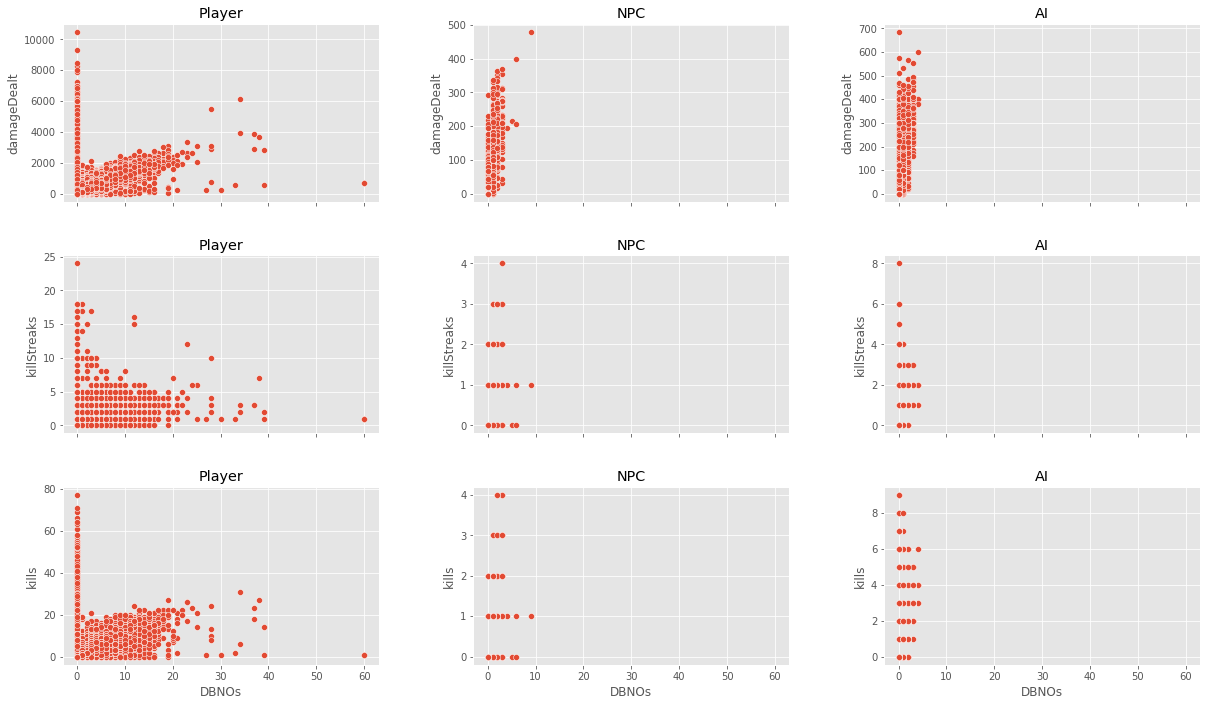

boosts correlations


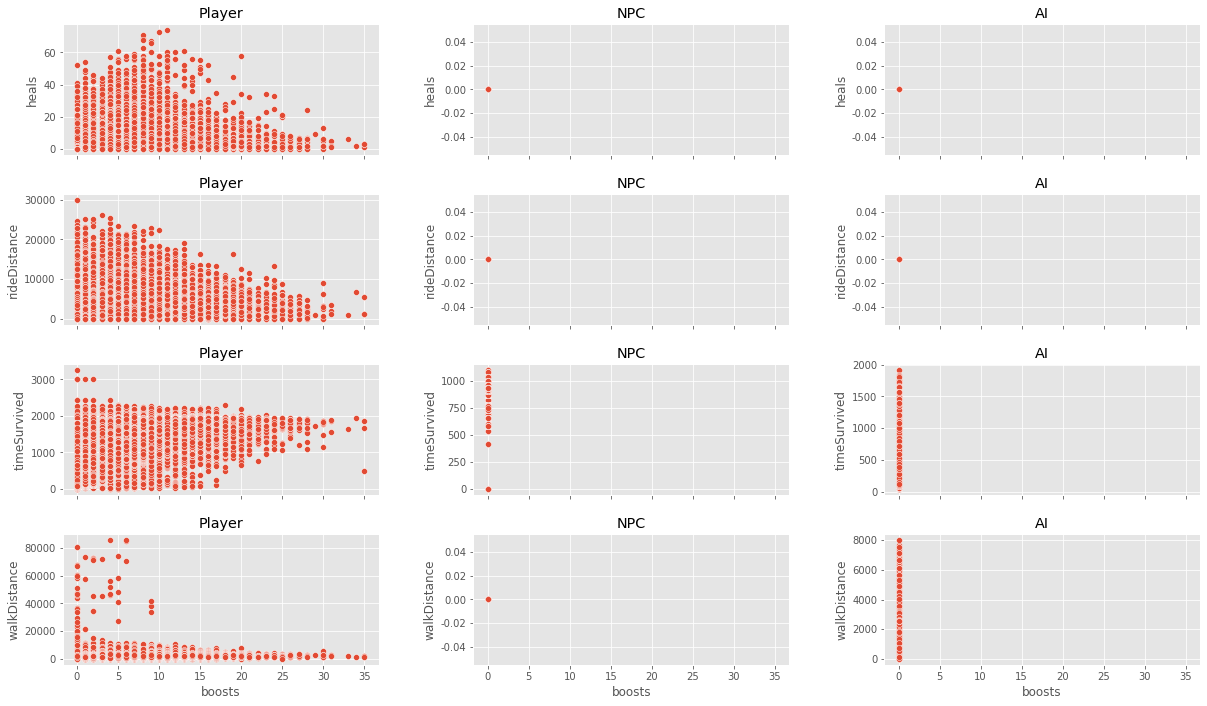

damageDealt correlations


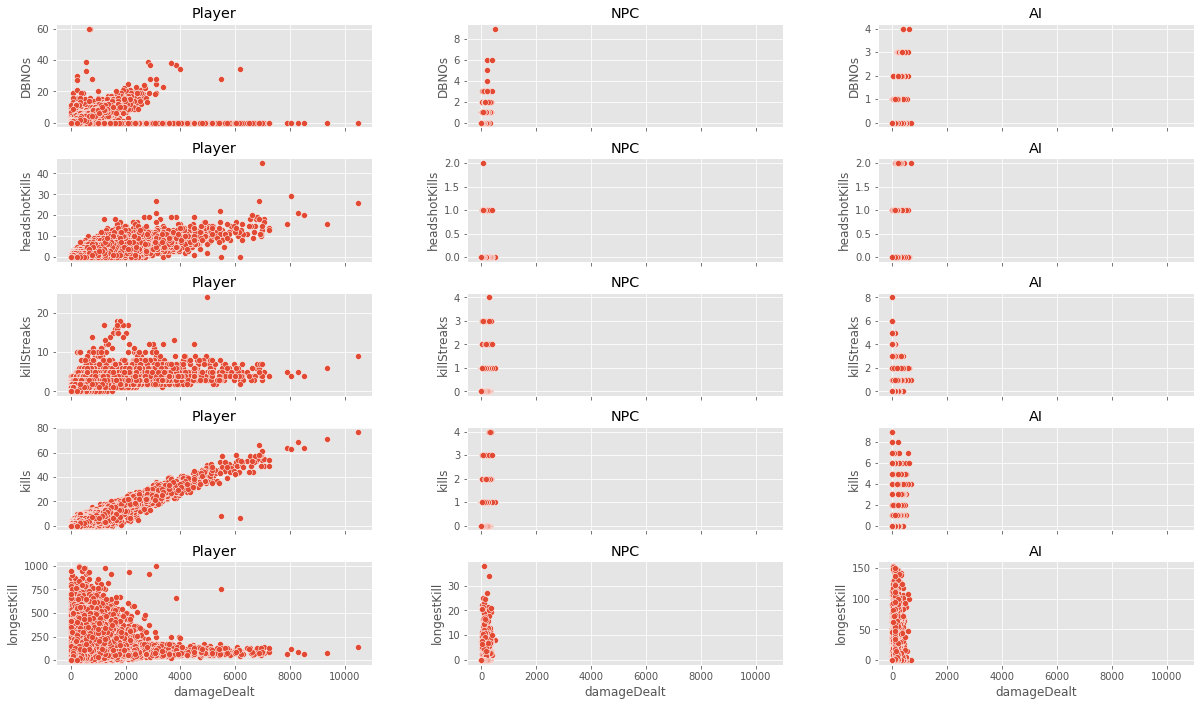

headshotKills correlations


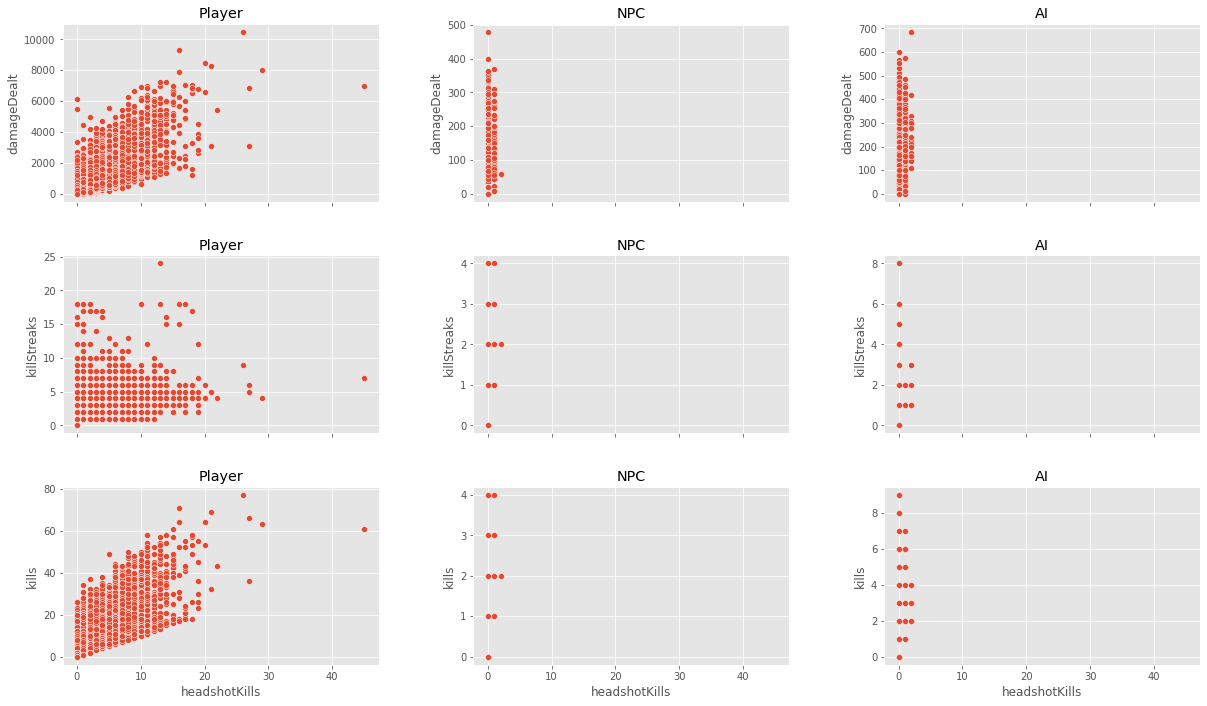

heals correlations


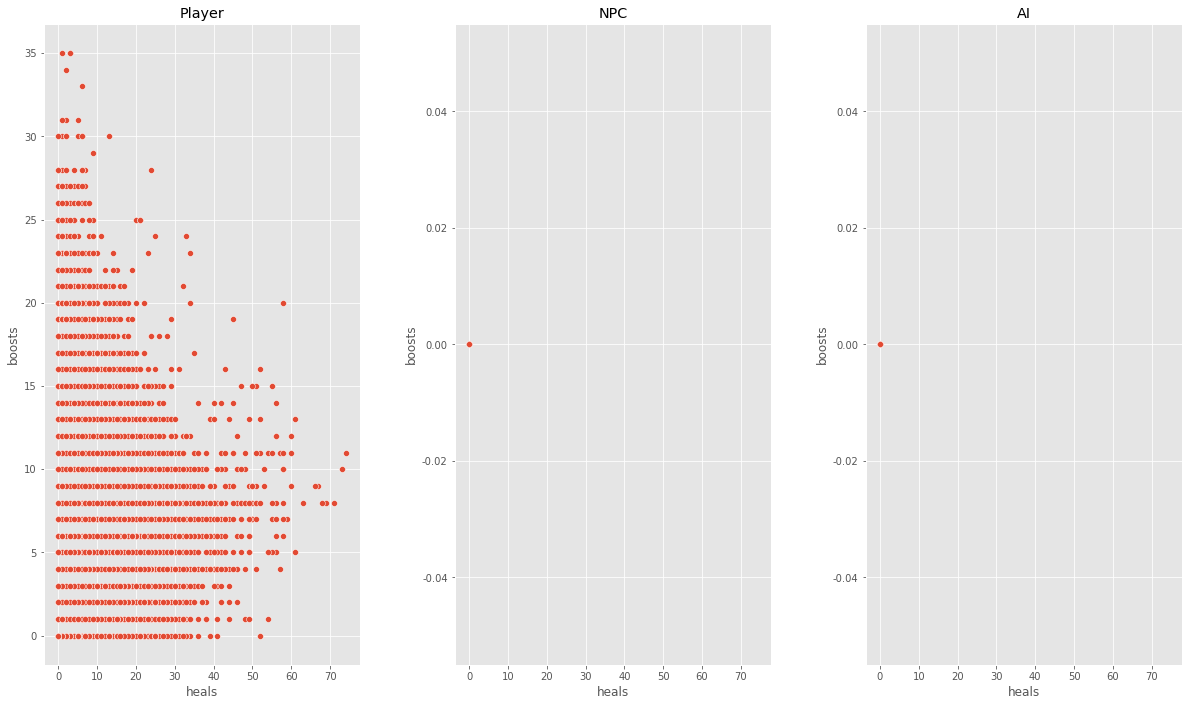

killPlace correlations


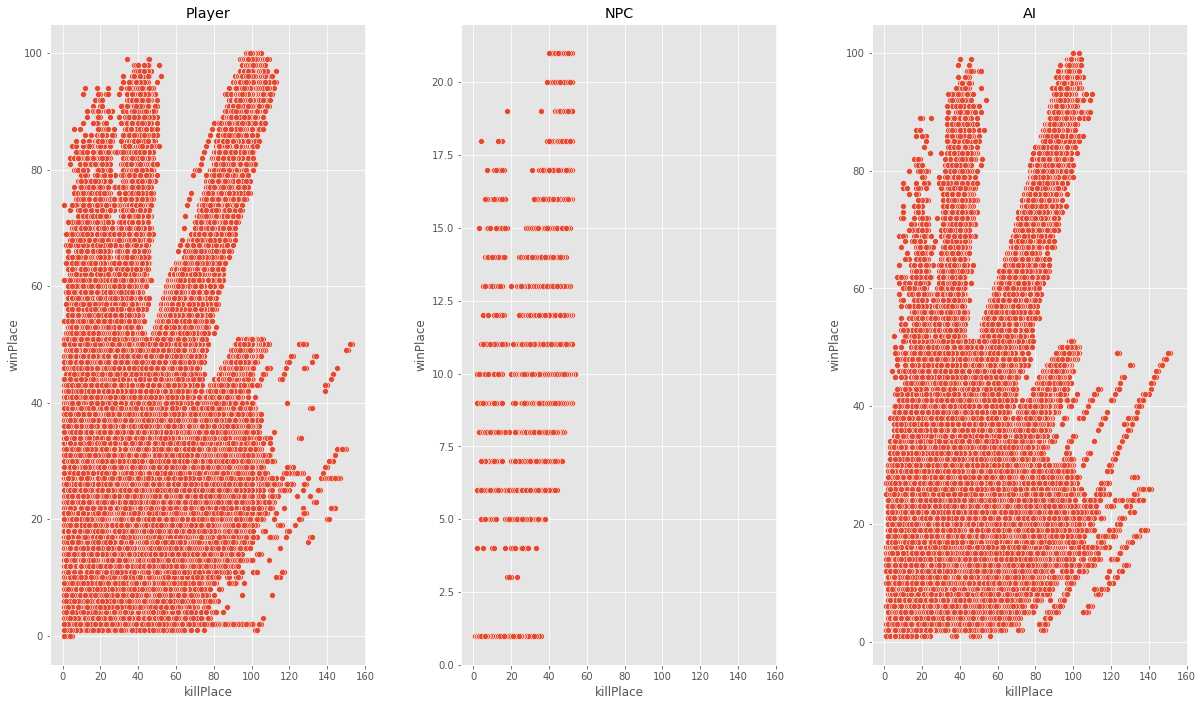

killStreaks correlations


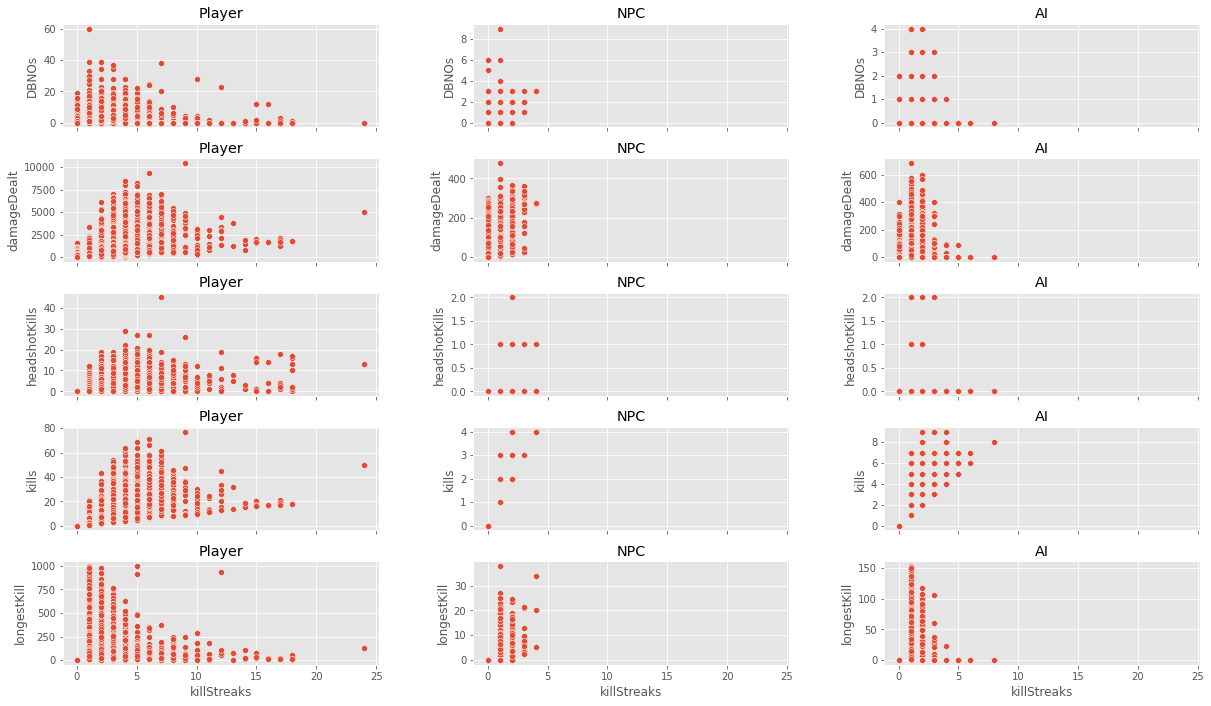

kills correlations


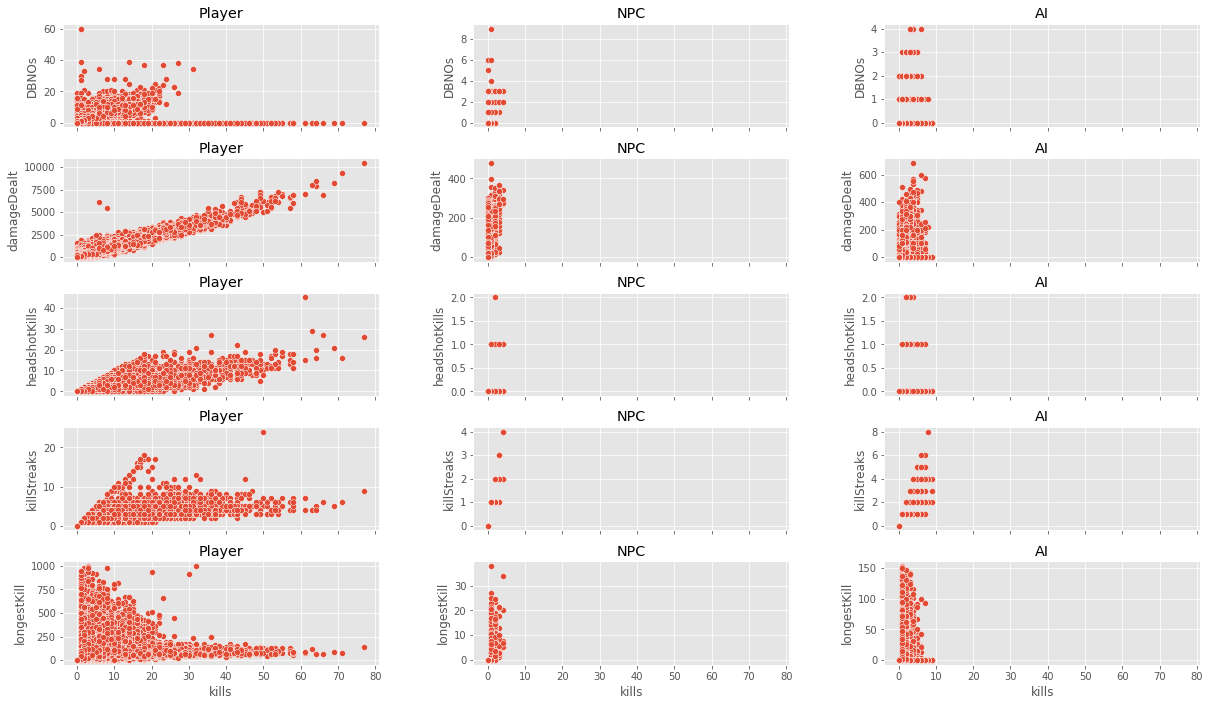

longestKill correlations


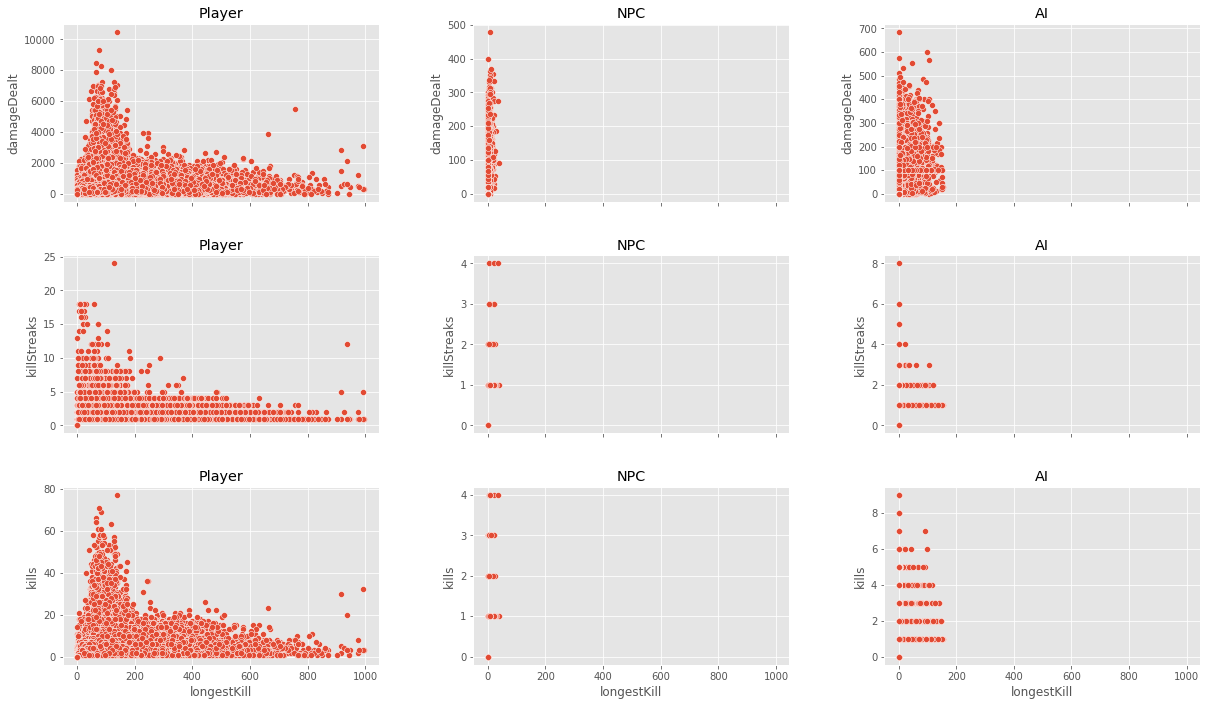

rideDistance correlations


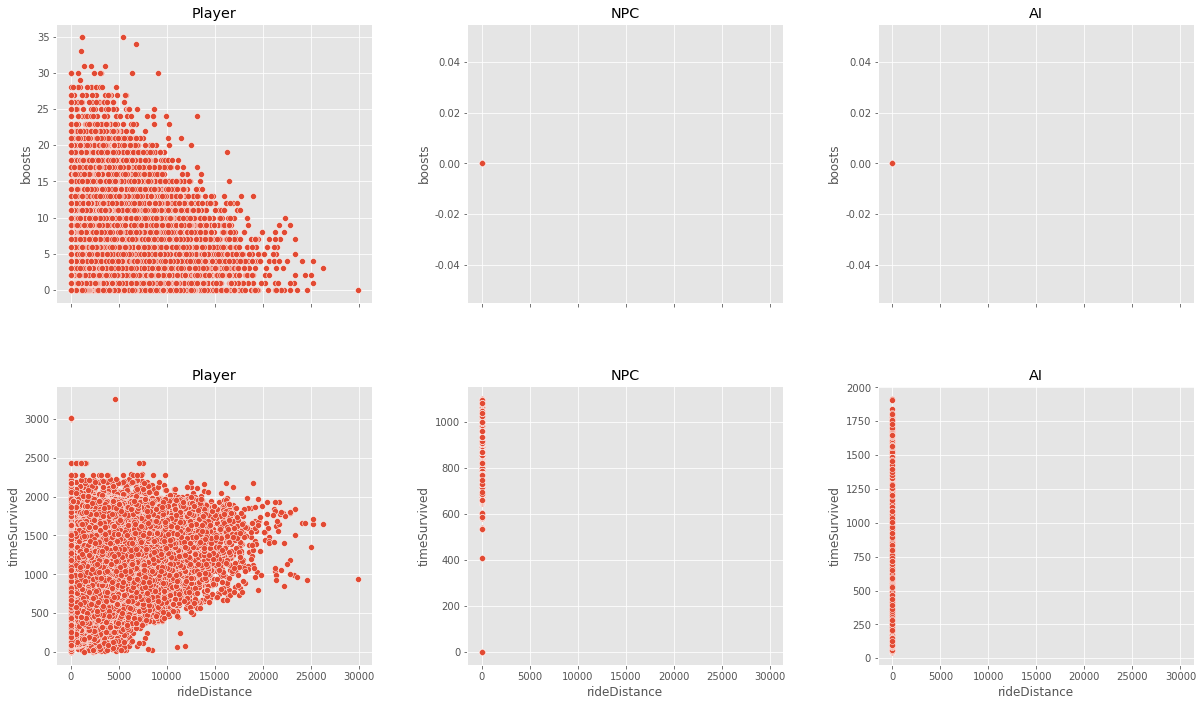

timeSurvived correlations


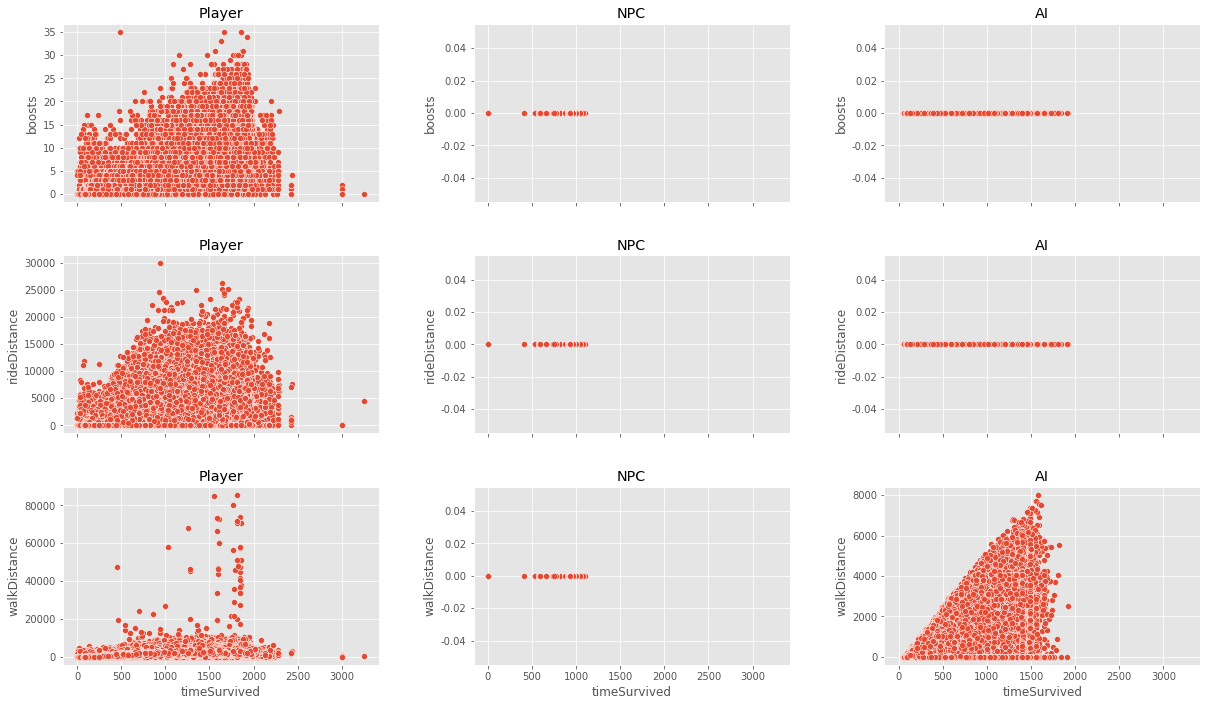

walkDistance correlations


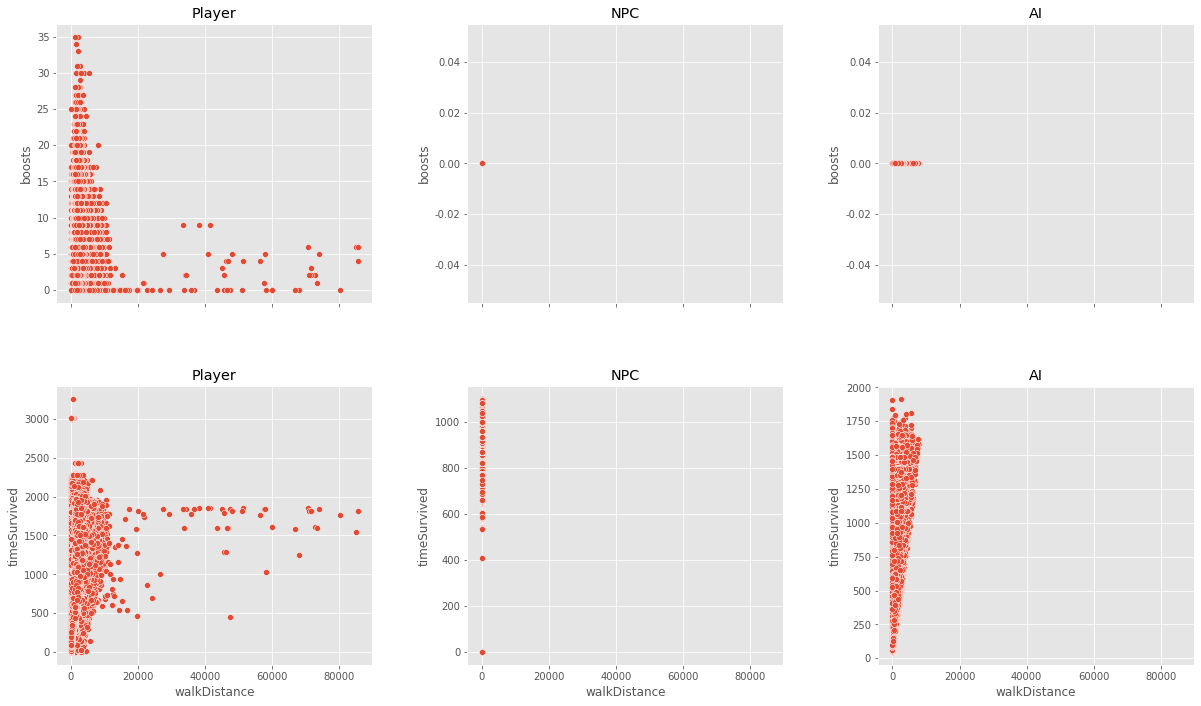

winPlace correlations


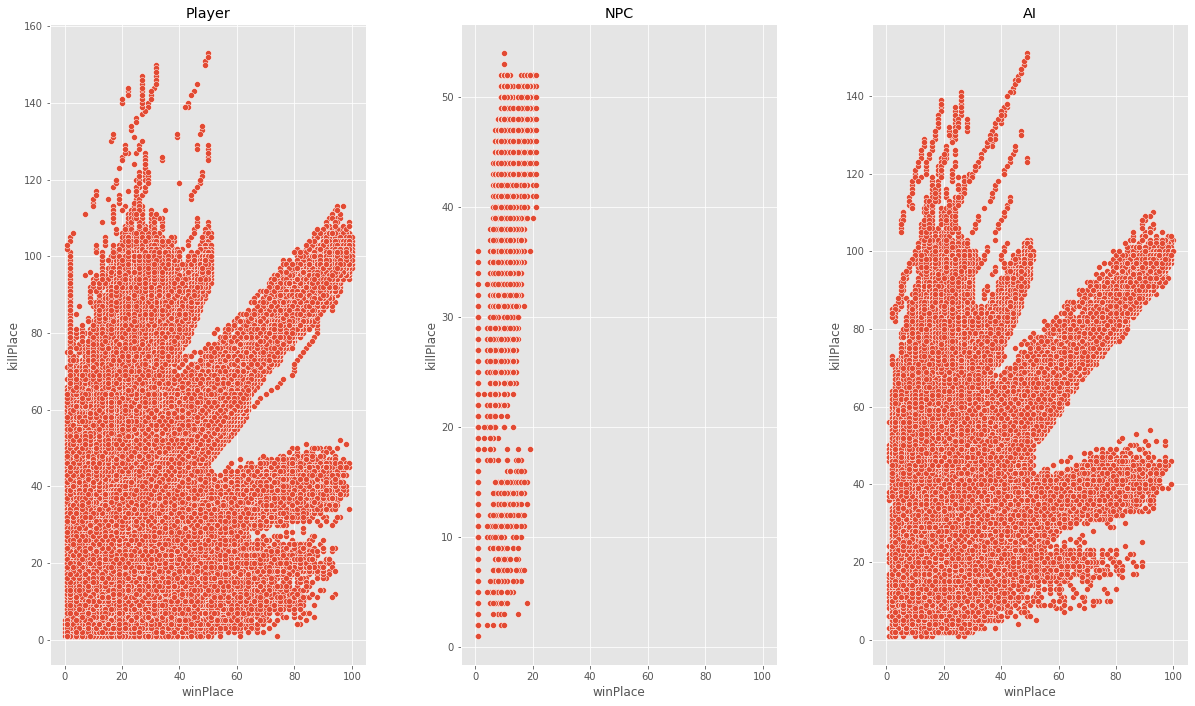

In [ ]:
# 분석 대상 컬럼들을 이용한 그래프 생성
for feature in target_features:
  fig_cal(feature)

**위 그래프에서 알 수 있는 사실**

1. DBNOs(마주친 플레이어 수)가 0임에도 딜량이 높은 플레이어, 연속 킬 수가 높은 플레이어, 킬 수가 높은 플레이어가 존재한다.

  - 이벤트맵(이벤트 사녹, 헤이븐), 훈련장맵 예상, 혹은 비인가프로그램 사용 예상

2. 한 게임에서는 최대 100명의 플레이어가 투입되고, 대부분이 0킬로 게임을 끝내거나, 평균 2~3킬, 최대 10킬 이내인데, 그 이상의 킬 로그를 보이는 플레이어들이 존재한다.

  - 커스텀맵, 혹은 비인가프로그램 사용 예상

3. 데이터의 분포가 선형을 띠는 데이터들이 있다.

    - 헤드샷 수와 딜량, 킬 수와 딜량, 킬 순위와 승리 순위, 헤드샷 수와 킬 수

4. AI(게임에 투입되는 플레이어 봇)는 실제 플레이어의 행동 패턴 기반으로 만들어졌다는 것을 알 수 있다. 일부 그래프에서 유사한 형태를 보이고 있기 때문이다. 다만, 많은 플레이어를 만나기 전에 조기에 처치되어 긴 로그 기록이 없는 듯 하다. AI들은 힐, 부스트, 운송수단 이용을 전혀 하지 않는다는 것을 알 수 있다.

  - 이동 거리가 없고 오래 살아남은 기록과 DBNOs가 0인데 킬 수가 있는 기록에 의문이 든다.

5. NPC는 명확하게 파악되지는 않지만, 이벤트성 게임의 일정 위치에 머무는 봇인 듯 하다. 예를 들면, 헤이븐의 무장 AI가 가능성이 있다.

6. AI와 NPC는 행동 양상에 일정한 범위가 있어, 인위적으로 설정한 활동 범위 내에서 행동한다는 것을 알 수 있다.

**그 밖에 주목할만한 데이터**


1. 거의 모든 킬 또는 모든 킬이 헤드샷인 데이터

  : 헤드샷 수와 전체 킬 수의 차이값

2. 킬 순위와 승리 순위의 차이가 심한 데이터

  : 킬 순위와 승리 순위 차이의 절대값

3. 연속 킬이 높은 데이터

  : 연속 킬 수와 전체 킬 수의 비율

4. 킬 수가 아주 높은 데이터

  : 일반적인 게임 내에서는 발생할 수 없는 값

### 3-7. 이상치 확인하기

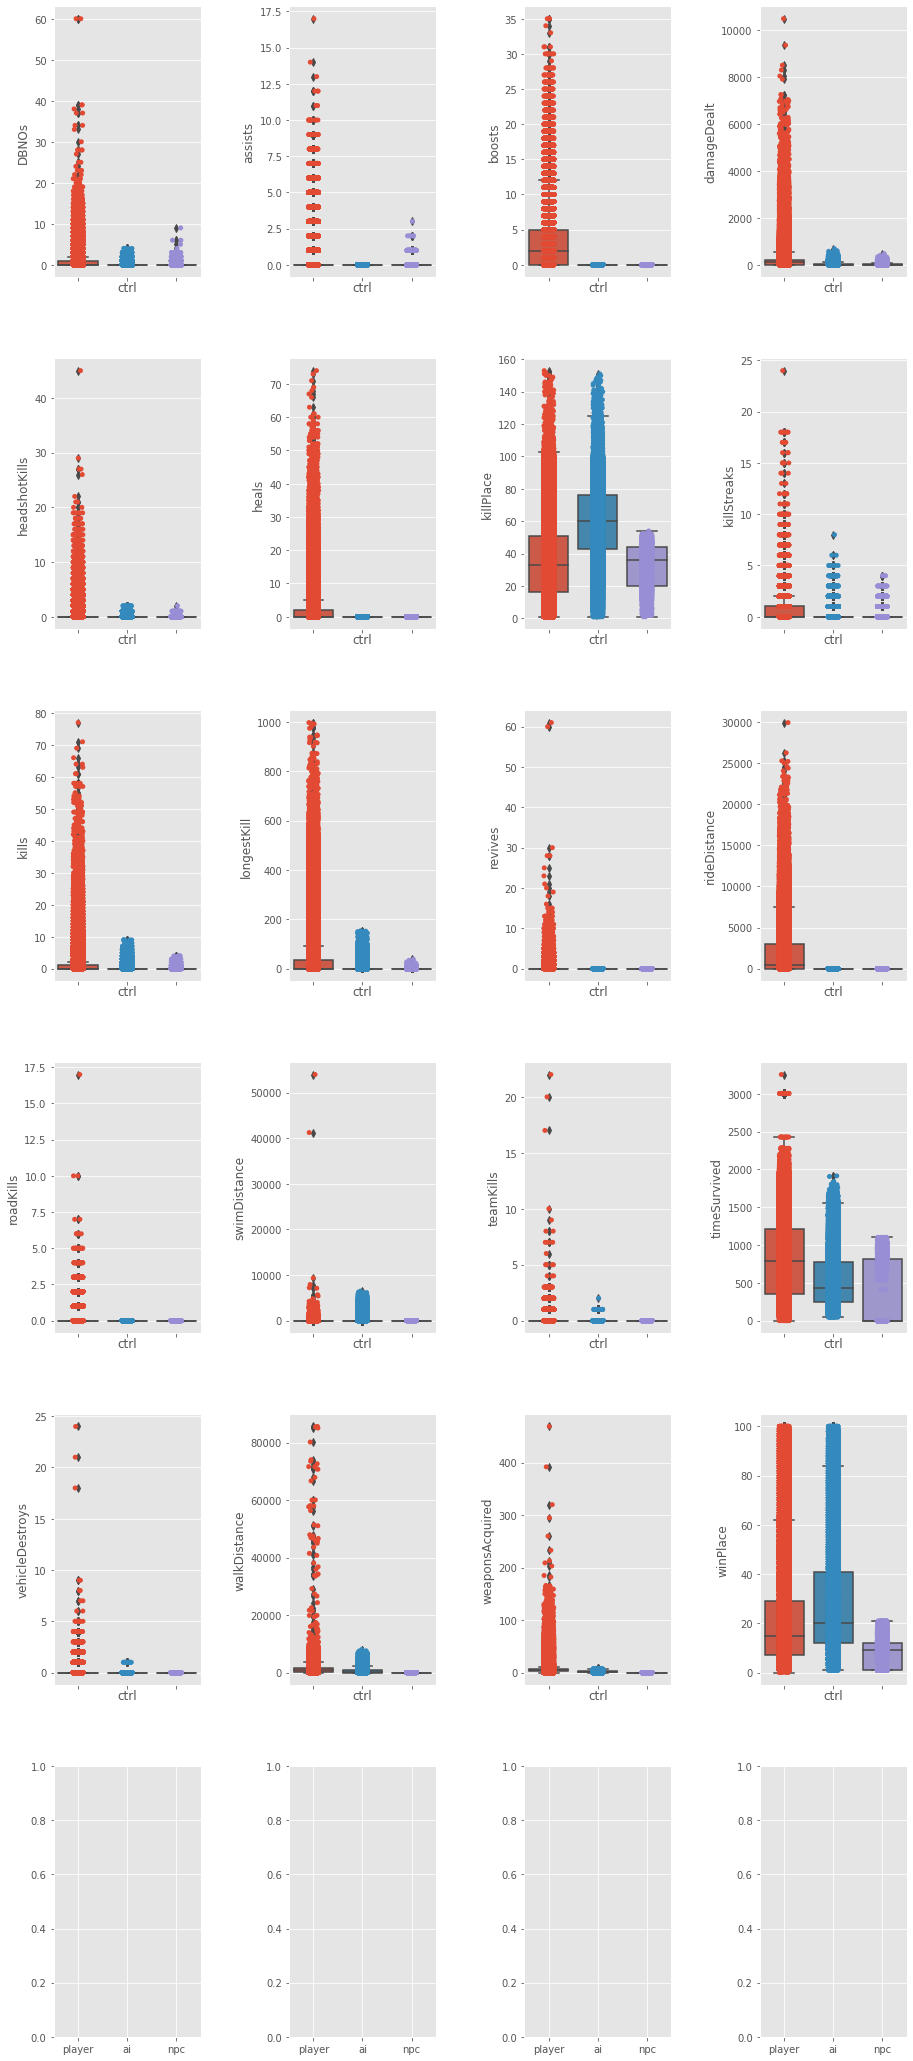

In [ ]:
# 피쳐별 스트립플롯과 박스플롯

fig, ax = plt.subplots(round(len(df1.columns)/4), 4, sharex=True, squeeze=False, figsize=(15,30))

plt.subplots_adjust(left=0.2, bottom=0.05, right=0.99, top=0.99, wspace=0.6, hspace=0.3)

k, j = 0, 0

for i in df1.columns[6:]:

  sns.stripplot(x = 'ctrl', y = i, orient = 'v', data = df1, ax=ax[j][k]) # 모든 데이터를 점으로 그려준다. 값 별 데이터의 양을 알 수 있다.
  sns.boxplot(x = 'ctrl', y = i, orient = 'v', data = df1, ax=ax[j][k]) # 사분위수, 최대·최소값, 이상점을 알 수 있다.
   
  if k == 3:
    j = j + 1
    k = 0
  else:
    k = k + 1

plt.show()

In [ ]:
# 이상치가 전체의 0.001인 피쳐를 확인하는 함수
def get_outlier(column):
  try:
    quantile2 = np.percentile(df1_player[column].values, 25) # 2분위수
    quantile3 = np.percentile(df1_player[column].values, 75) # 3분위수

    limit = ((quantile3 - quantile2) * 1.5) # IQR을 이용해, 박스플롯의 whisker 상하단의 값을 구한다.
    
    lowest = quantile2 - limit # whisker 하단 값
    highest = quantile3 + limit # whisker 상단 값
    
    outliers = df1_player[column][(df1_player[column] < lowest) | (df1_player[column] > highest)].index # 아웃라이어 값의 인덱스를 구한다.

    if len(outliers) >= (len(df1_player[column]) * 0.001): # 아웃라이어의 갯수가 해당 컬럼 값의 갯수의 0.001 보다 크면 해당 컬럼을 출력한다.
      return column, print(column)

  except:
    pass

In [ ]:
print('이상치의 비율이 전체의 0.001인 피쳐들')
for column in df1_player.columns.values:
  get_outlier(column)

이상치의 비율이 전체의 0.001인 피쳐들
DBNOs
assists
boosts
damageDealt
headshotKills
heals
killStreaks
kills
longestKill
revives
rideDistance
roadKills
swimDistance
teamKills
vehicleDestroys
walkDistance
weaponsAcquired
winPlace


위 피쳐들 중, 분석에 사용할 피쳐와 그래프는 다음과 같다.

countplot
- DBNOs, assists, boosts, headshotKills, killStreaks, kills, revives, roadKills, teamKills, vehicleDestroys, weaponsAcquired

   : 정수형으로 기록된 데이터로, countplot으로 표현하기에 알맞다.

distplot
- damageDealt, rideDistance, swimDistance

  : 실수형으로 기록된 데이터로, 밀도를 표현할 수 있는 distplot이 적절하다.

In [ ]:
count_list = ['DBNOs', 'assists', 'boosts', 'headshotKills', 'killStreaks', 'kills', 'revives', 'roadKills', 'teamKills', 'vehicleDestroys', 'weaponsAcquired']
dist_list = ['damageDealt', 'rideDistance', 'swimDistance', 'timeSurvived']

In [ ]:
def fig_count(feature):

  figure, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
  figure.set_size_inches(20, 5)

  sns.countplot(data = df1_player, x=feature, ax=ax1)
  sns.countplot(data = df1_npc, x =feature, ax=ax2)
  sns.countplot(data = df1_ai, x=feature, ax=ax3)

  ax1.set(ylabel='count', title=("Player " + feature))
  ax2.set(ylabel='count', title=("NPC " + feature))
  ax3.set(ylabel='count', title=("AI " + feature))

In [ ]:
def fig_dist(feature):

  figure, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
  figure.set_size_inches(20, 5)

  sns.distplot(df1_player[feature], bins=10, ax=ax1)
  sns.distplot(df1_npc[feature], bins=10, ax=ax2)
  sns.distplot(df1_ai[feature], bins=10, ax=ax3)

  ax1.set(title=("Player " + feature))
  ax2.set(title=("NPC " + feature))
  ax3.set(title=("AI " + feature))

In [ ]:
df1_player.describe()

,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
count,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00,1829990.00
mean,1.00,0.00,0.00,0.57,0.22,2.89,160.60,0.30,1.79,35.25,0.54,1.04,34.55,0.16,1675.30,0.01,3.90,0.01,817.57,0.02,1134.44,4.65,20.91
std,0.00,0.00,0.00,1.21,0.60,3.18,225.84,0.73,3.02,23.66,0.68,1.83,67.88,0.49,2217.55,0.11,64.51,0.08,514.27,0.16,978.05,3.64,18.66
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,346.40,0.00,316.64,3.00,7.00
50%,1.00,0.00,0.00,0.00,0.00,2.00,100.00,0.00,0.00,33.00,0.00,0.00,0.00,0.00,389.08,0.00,0.00,0.00,789.63,0.00,1002.75,4.00,15.00
75%,1.00,0.00,0.00,1.00,0.00,5.00,217.53,0.00,2.00,51.00,1.00,1.00,36.38,0.00,2994.26,0.00,0.00,0.00,1216.35,0.00,1709.42,6.00,29.00
max,1.00,0.00,0.00,60.00,17.00,35.00,10471.70,45.00,74.00,153.00,24.00,77.00,996.55,61.00,29923.35,17.00,53958.12,22.00,3255.76,24.00,85604.51,469.00,100.00


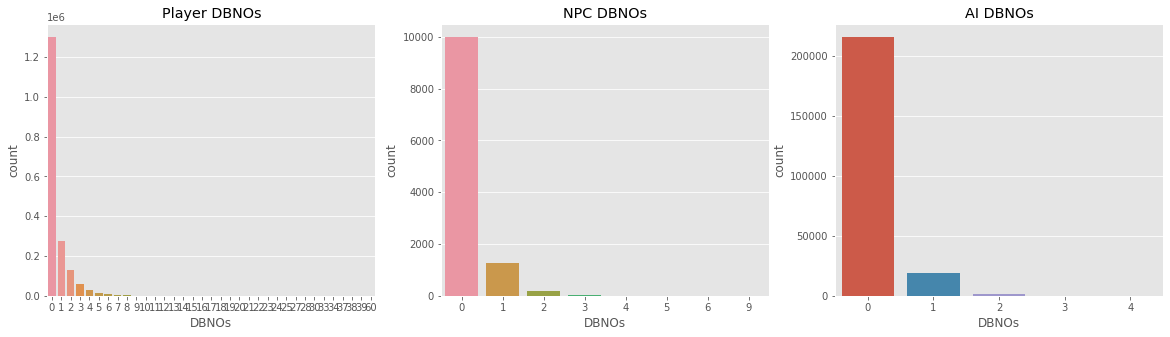

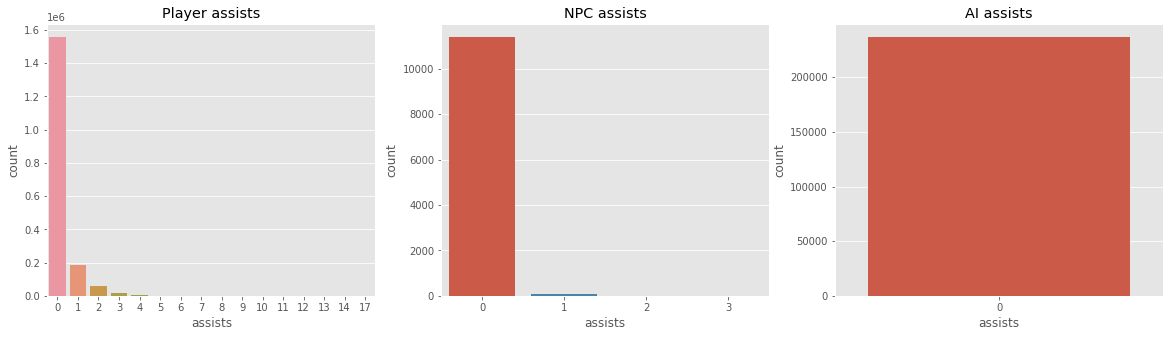

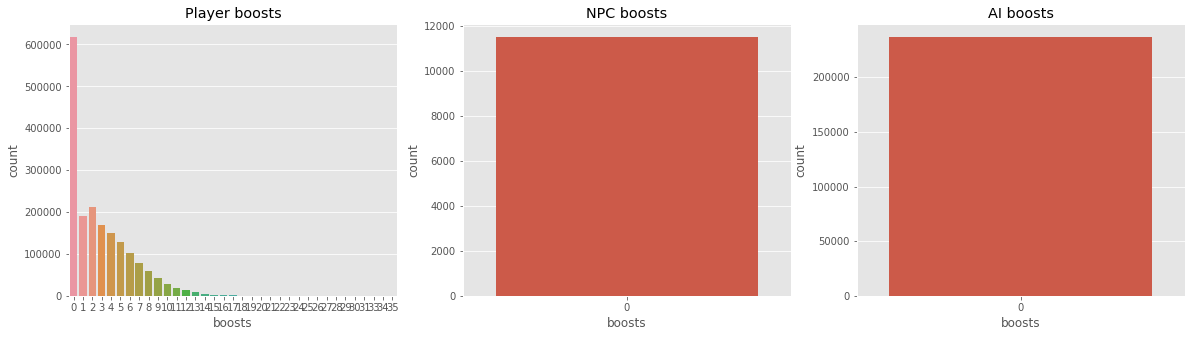

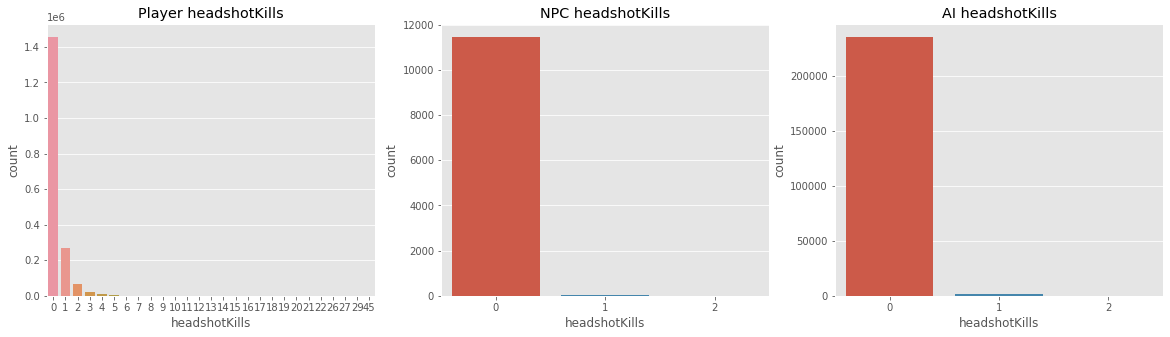

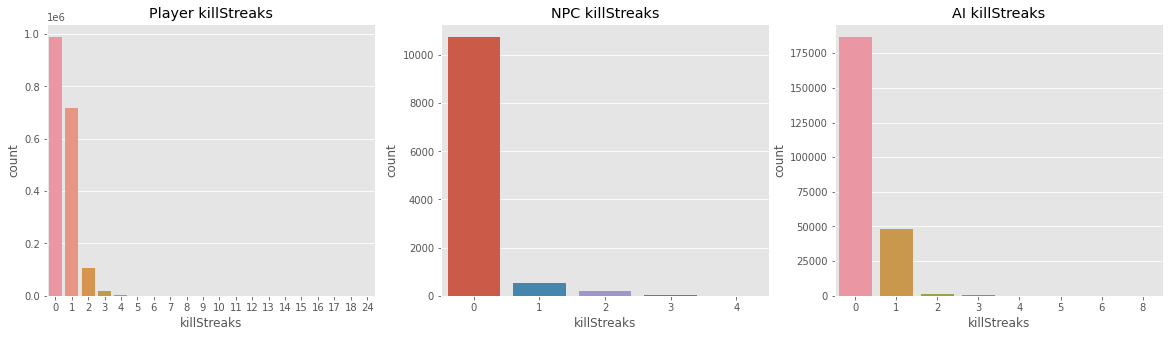

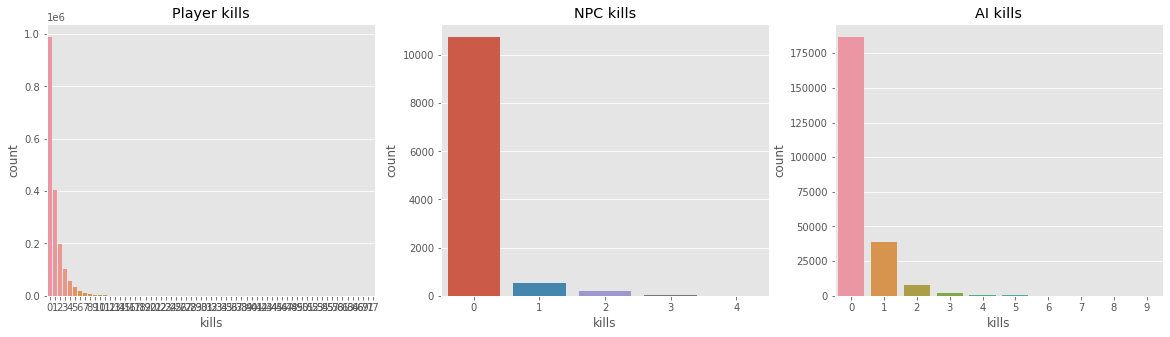

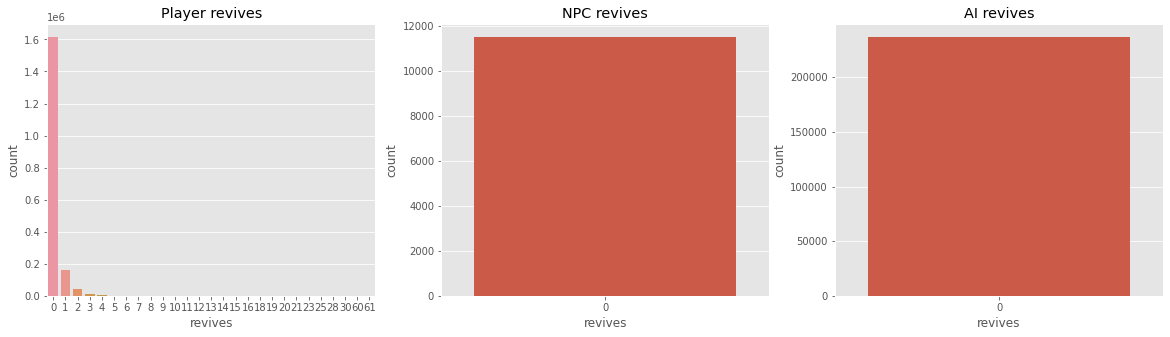

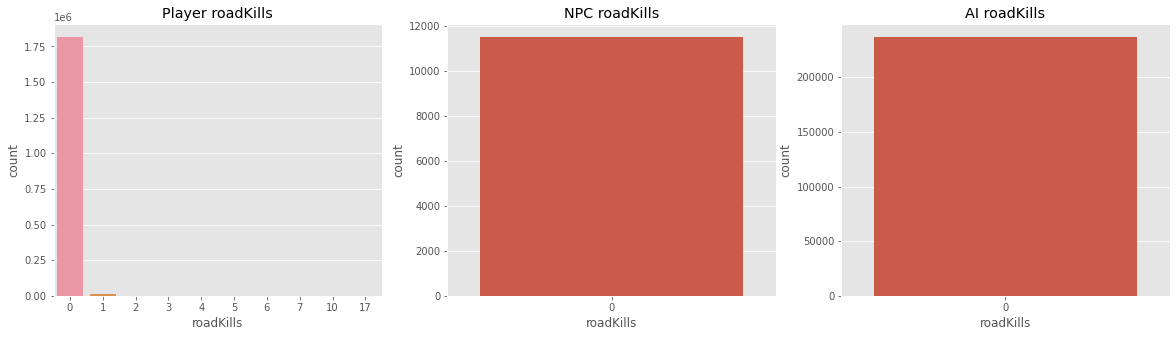

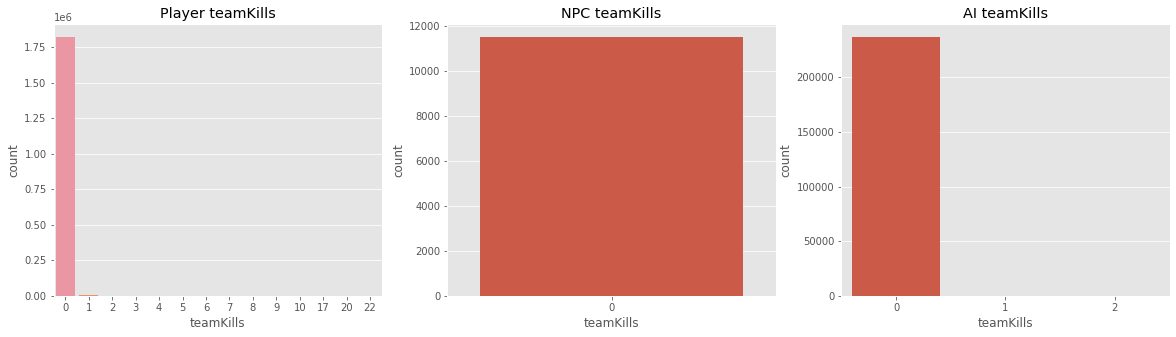

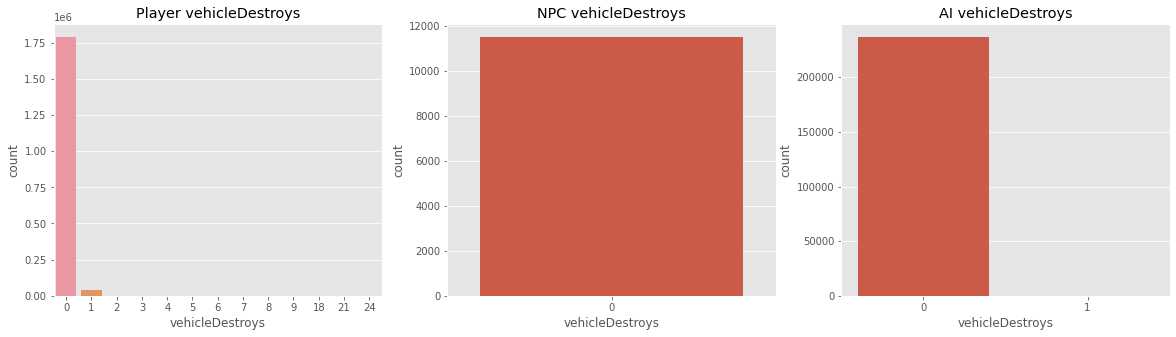

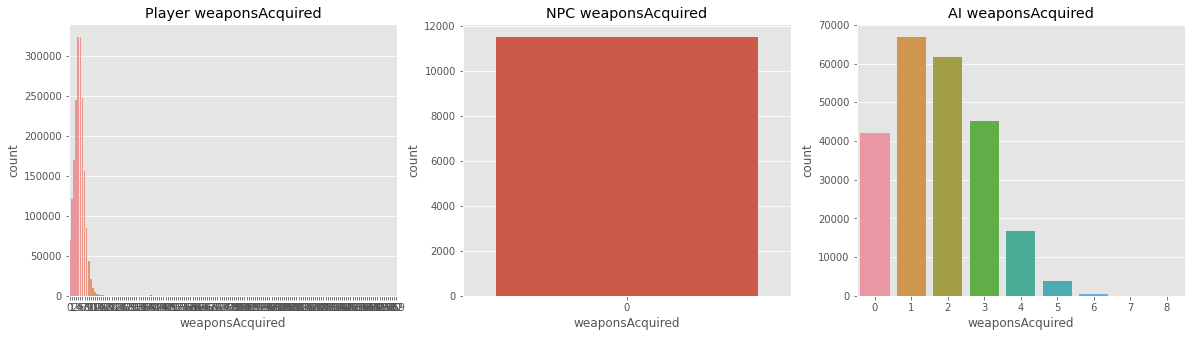

In [ ]:
for feature in count_list:
  fig_count(feature)

countplot을 확인해보았을 때, 데이터 안에 비인가 프로그램을 사용한 플레이어 또는, 훈련장이나 헤이븐 등 이벤트 맵, 커스텀 맵의 로그가 섞여있는 것으로 추측된다.

- DBNOs, kills, headshotKills, boosts, weaponsAquired에서 일반적인 값보다 큰 데이터가 존재하기 때문이다.

- assists, revives, teamKills의 경우 솔로 플레이에서는 불가능하기 때문이다.

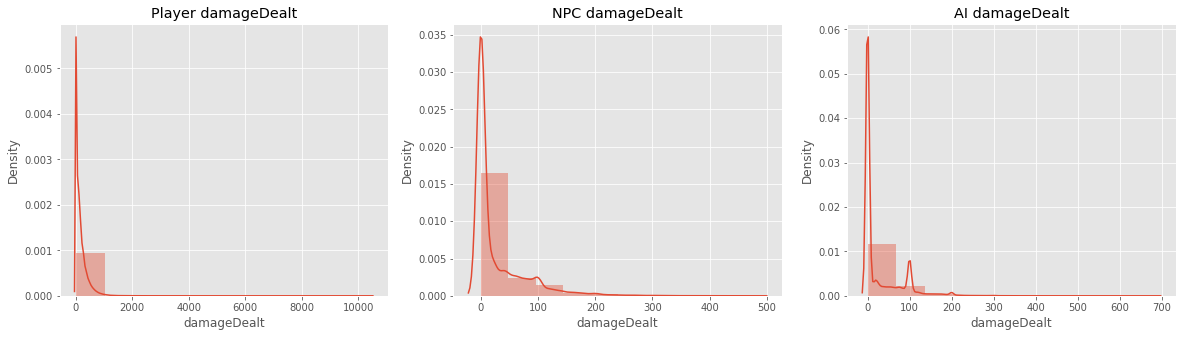

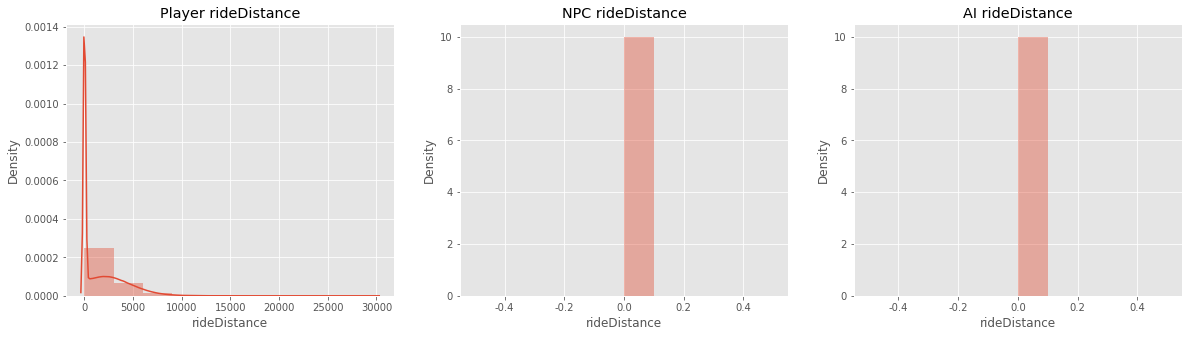

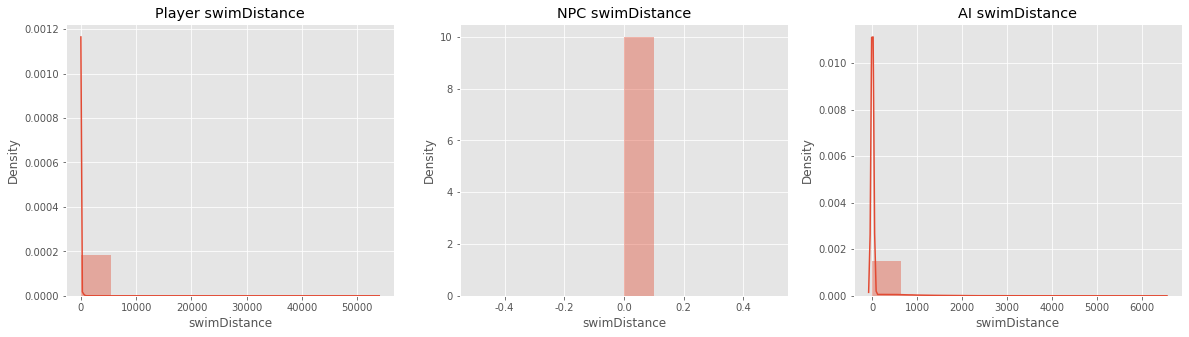

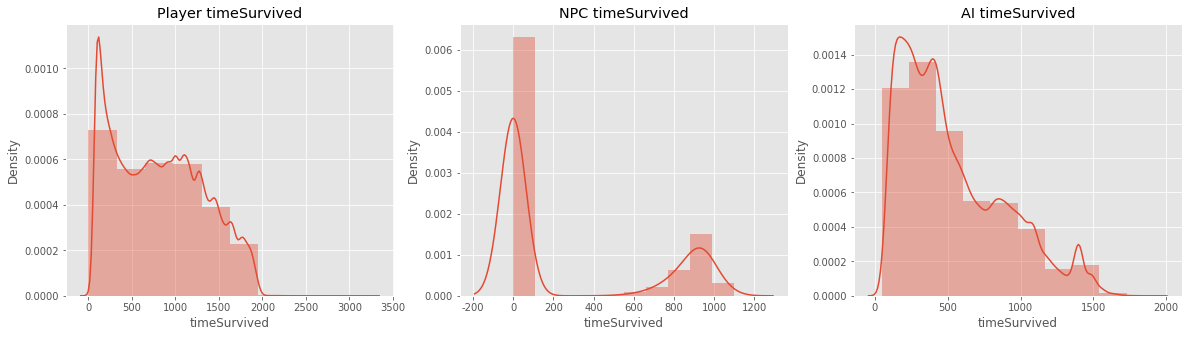

In [ ]:
for feature in dist_list:
  fig_dist(feature)

### 3-8. 킬 수에 따른 데이터 분석

- 총 킬 수와 헤드샷 킬 수가 같은 플레이어

- 총 킬 수가 많은 플레이어

- 킬 순위와 승리 순위의 차이가 많이 나는 플레이어

**총 킬 수와 헤드샷 킬 수가 같은 플레이어**

In [ ]:
# 킬 수와 헤드샷 수가 같으며, 5를 초과하는 플레이어를 연속 킬 수 기준으로 정렬 
df1_player[(df1_player.kills > 5) & (df1_player.kills == df_player.headshotKills)].sort_values(by=['killStreaks'], ascending=[False])

,playerId,ctrl,deathType,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
983696,account.dc44a2d79efd4091a61de5a0ef5f1cbf,player,byplayer,1,0,0,0,0,0,1200.96,18,0,1,17,18,13.38,0,0.00,0,0.00,0,248.12,0,466.25,1,11
1598686,account.ade77841013b4810a6c345a7306be13d,player,byplayer,1,0,0,0,0,1,600.00,6,0,2,6,6,57.73,0,1194.02,0,0.00,0,596.04,0,1283.44,2,30
426926,account.398d5ac0a2df473cb2a2a602698e6d64,player,byplayer,1,0,0,3,0,2,600.00,6,2,3,5,6,6.87,0,4755.88,0,0.00,0,940.68,0,1162.59,8,13
1776249,account.de8a1da4490e4877a2e450816730f37f,player,byplayer,1,0,0,3,8,5,377.80,6,3,3,5,6,8.69,0,3902.91,0,0.00,0,1581.71,0,2185.10,10,1
1011815,account.7fee6a887a034b3597346d224edaaa2e,player,byplayer,1,0,0,0,0,0,672.48,6,0,4,5,6,3.49,0,0.00,0,0.00,0,203.00,0,169.73,1,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414117,account.ebe0f2147d8c4a3086cd6435205fae22,player,byplayer,1,0,0,0,0,9,622.00,6,0,1,1,6,189.48,0,2488.54,0,0.00,0,1853.04,0,2710.88,8,3
1109833,account.d1e5cec328ec4b8281f60dbf4c8967ba,player,alive,1,0,0,0,0,9,689.09,7,1,3,1,7,75.95,0,0.00,0,0.00,0,1518.48,0,2291.45,3,1
1064712,account.7a1aa42534694088b36e5794f84ebb5a,player,byplayer,1,0,0,0,0,4,880.66,7,0,2,1,7,421.03,0,5380.55,0,19.10,0,1390.61,0,1402.28,6,6
1064600,account.98e7b1a4ddfe48e39e969c1d73ba5bb9,player,byplayer,1,0,0,3,0,6,518.56,6,3,5,1,6,225.31,0,4273.18,0,0.00,0,1275.02,0,1412.93,6,13


상위 랭커들의 경우, 20킬을 넘는 경우가 있고, 10킬을 넘는 경우가 종종 보인다. 하지만 모든 킬 수(kills)가 헤드샷의 킬 수(headshotKills)와 같고, 또한, 연속 킬 수(killStreaks)가 높다면 비인가 프로그램 사용에 의문을 가질 수 있다.

무기 획득 횟수(weaponsAcquired) 역시 지나치게 적은 경우, 파밍을 하지 않았다는 것으로 볼 수 있기 때문에 비인가 프로그램 사용을 의심할 수 있다.

**킬 수가 많은 플레이어**

In [ ]:
# 킬 수가 10 이상인 플레이어
kills_player = df1_player[df1_player.kills >= 10]
display(kills_player)
display(kills_player.describe())

,playerId,ctrl,deathType,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
294,account.feee55eff011418f958ec3794fa8cdff,player,byplayer,1,0,0,12,0,7,1419.19,2,5,1,2,10,233.94,1,2293.47,1,0.00,0,1560.01,0,1770.31,5,4
814,account.0269b86b659546e99dab04d50776fffe,player,alive,1,0,0,10,0,6,1110.03,5,3,1,3,10,79.23,0,2431.07,0,0.00,0,1534.79,0,2083.17,4,1
982,account.136f5919872e4c02a18a73f3b46a2ca1,player,alive,1,0,0,8,1,4,1219.06,4,2,1,3,12,79.53,0,0.00,0,0.00,0,1208.05,0,3499.97,10,1
1354,account.8d0670dad16647c6ad77ae94900efcef,player,byzone,1,0,0,7,0,12,1573.56,2,5,1,2,11,86.32,1,6145.69,0,0.00,0,1918.61,0,2050.42,3,1
1451,account.79a0d6fd43c84d06a01f92bf447959c1,player,alive,1,0,0,8,1,3,1334.45,6,3,1,2,10,261.54,0,7355.93,0,0.00,0,1769.45,0,2219.47,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076199,account.6e49106c3d1849f799347c38b986dcd4,player,alive,1,0,0,8,0,4,1260.91,3,0,1,2,13,197.47,0,0.00,0,0.00,0,1611.09,0,3473.37,7,1
2076411,account.71ebe99b2dbf4c808bcd94a8658b0a31,player,logout,1,0,0,9,0,13,1179.02,6,7,1,4,11,297.43,0,5065.85,0,0.00,0,1731.30,0,2726.15,5,1
2076429,account.e06ecef70343493c87cce8c4a2a04778,player,alive,1,0,0,11,2,17,1252.30,7,2,1,3,13,67.38,2,5088.41,0,0.00,0,1787.98,0,2355.53,7,1
2077440,account.d14b81a0fb8c487c9b234b139b3acee0,player,byzone,1,0,0,9,0,4,1332.36,9,1,1,3,11,229.88,1,3873.14,0,0.00,0,1457.80,0,2699.50,2,7


,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
count,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00,9142.00
mean,1.00,0.00,0.00,2.97,0.41,4.75,1680.76,4.07,2.41,2.70,2.78,14.69,135.56,0.25,1549.65,0.06,2.45,0.01,1149.94,0.07,1312.98,24.27,2.27
std,0.00,0.00,0.00,4.51,1.01,5.05,833.40,2.82,3.44,2.67,1.57,6.66,93.90,0.74,2474.62,0.39,22.35,0.22,529.40,0.29,1860.36,25.20,3.00
min,1.00,0.00,0.00,0.00,0.00,0.00,227.34,0.00,0.00,1.00,1.00,10.00,1.11,0.00,0.00,0.00,0.00,0.00,22.42,0.00,0.00,0.00,1.00
25%,1.00,0.00,0.00,0.00,0.00,0.00,1155.49,2.00,0.00,1.00,2.00,10.00,67.02,0.00,0.00,0.00,0.00,0.00,620.32,0.00,0.00,6.00,1.00
50%,1.00,0.00,0.00,0.00,0.00,4.00,1430.05,4.00,1.00,1.00,2.00,12.00,104.88,0.00,0.00,0.00,0.00,0.00,1174.90,0.00,1317.79,9.00,1.00
75%,1.00,0.00,0.00,7.00,0.00,9.00,1926.39,5.00,4.00,4.00,3.00,16.00,178.10,0.00,2777.46,0.00,0.00,0.00,1672.33,0.00,2388.53,39.00,2.00
max,1.00,0.00,0.00,39.00,9.00,30.00,10471.70,45.00,39.00,16.00,24.00,77.00,993.65,30.00,18378.56,17.00,815.77,17.00,2274.73,9.00,80185.96,233.00,50.00


킬 수(kills) 뿐만 아니라 damageDealt, headshotKills, heals, killStreaks, rideDistance, walkDistance, weaponsAcquired 등 많은 피쳐에서 이상치를 보이고 있다.

In [ ]:
# 'newID', 'logging_timestamp' 기준 정렬
kills_player.sort_values(by=['kills'], ascending=[False]).head(10)

,playerId,ctrl,deathType,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
540840,account.053f144ef0964b47935d4271743bc10e,player,byplayer,1,0,0,0,0,0,10471.70,26,0,1,9,77,138.82,0,0.00,0,0.00,0,1794.53,0,0.00,233,2
1657138,account.053f144ef0964b47935d4271743bc10e,player,byplayer,1,0,0,0,0,0,9343.68,16,0,1,6,71,76.42,0,0.00,0,0.00,0,1763.02,0,0.00,111,1
748891,account.053f144ef0964b47935d4271743bc10e,player,byplayer,1,0,0,0,0,0,8289.43,21,0,1,5,69,81.86,0,0.00,0,0.00,0,1815.52,0,0.00,165,2
966514,account.769acaf0a1ad4c92a32b829dc6cdf1a4,player,byplayer,1,0,0,0,0,0,6860.13,27,0,1,6,66,66.77,0,0.00,0,0.00,0,1612.45,0,0.00,102,1
2052142,account.053f144ef0964b47935d4271743bc10e,player,byplayer,1,0,0,0,0,0,8496.14,20,0,1,4,64,64.64,0,0.00,0,0.00,0,1712.79,0,0.00,156,1
966516,account.053f144ef0964b47935d4271743bc10e,player,byplayer,1,0,0,0,0,0,7899.00,16,0,2,5,64,67.53,0,0.00,0,0.00,0,1619.93,0,0.00,150,2
1859227,account.78a2daa5168b45bb89506764b8cd9108,player,byplayer,1,0,0,0,0,0,8033.37,29,0,1,4,63,116.83,0,0.00,0,0.00,0,1727.59,0,0.00,138,2
1828798,account.b6764da096f647c1b9eff9665da8e9d6,player,byplayer,1,0,0,0,0,0,6977.04,45,0,1,7,61,85.06,0,0.00,0,0.00,0,1010.97,0,0.00,64,1
1657140,account.769acaf0a1ad4c92a32b829dc6cdf1a4,player,byplayer,1,0,0,0,0,0,6972.80,15,0,2,4,61,74.76,0,0.00,0,0.00,0,1776.53,0,0.00,120,2
2066105,account.769acaf0a1ad4c92a32b829dc6cdf1a4,player,byplayer,1,0,0,0,0,0,6013.34,14,0,1,6,58,90.25,0,0.00,0,0.00,0,914.87,0,0.00,81,2


생존시간, 사망유형, 킬 수(한 게임에서 최대 100명까지 동시 플레이), 무기획득 수, 이동 로그로 보았을 때, 커스텀 모드에서 플레이했을 가능성이 있다.

In [ ]:
# '' 기준 정렬
kills_player.sort_values(by=['killStreaks'], ascending=[False]).head(10)

,playerId,ctrl,deathType,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
606175,account.5021b6f4278841a0bd0aacccd6fb9df4,player,byplayer,1,0,0,0,0,0,4974.15,13,0,1,24,50,128.04,0,0.00,0,0.00,0,354.85,0,0.00,37,1
523669,account.bedb353e0264423a8a9f3c8044998643,player,byplayer,1,0,0,0,0,0,1700.00,16,0,1,18,18,15.04,0,203.65,0,0.00,0,160.78,0,231.97,2,12
1269973,account.dc480a6cd9f7497b88f9a607e83b6ae8,player,byplayer,1,0,0,0,0,0,1800.00,17,0,1,18,18,11.27,0,0.00,0,0.00,0,165.80,0,103.58,2,12
722193,account.c974966e3dce46f4b63b2f49eaa876ef,player,byplayer,1,0,0,0,0,0,1790.93,1,0,1,18,18,24.25,0,0.00,0,0.00,0,174.65,0,157.07,2,14
201477,account.6102330e72c6482e8fd7f4e4359b7a5e,player,byplayer,1,0,0,0,0,0,1800.00,13,0,1,18,18,6.18,0,0.00,0,0.00,0,160.70,0,122.32,3,12
1562714,account.73435d5d5ac14fed9a6e69d22f88fab9,player,byplayer,1,0,0,0,0,0,1800.00,2,0,1,18,18,11.04,0,0.00,0,0.00,0,177.03,0,144.18,1,13
1007337,account.4e446ed1333c4bcd966925aaf90dcc83,player,byplayer,1,0,0,1,0,0,1800.00,2,0,1,18,18,58.12,0,0.00,0,0.00,0,179.93,0,265.88,2,12
290647,account.c2ca61abf9604177a75ea55e5d18dd85,player,byplayer,1,0,0,0,0,0,1800.00,0,0,1,18,18,7.16,0,0.00,0,0.00,0,158.23,0,30.97,1,12
272426,account.222ba46f4e504cedb436db98214c3d3d,player,byplayer,1,0,0,0,0,0,1800.00,10,0,1,18,18,31.47,0,0.00,0,0.00,0,162.62,0,106.86,5,13
446520,account.23bfa99191894ece97057b3b332393e3,player,byplayer,1,0,0,3,0,2,2100.00,1,3,1,17,21,7.58,0,3813.70,17,0.00,0,754.83,0,349.57,5,11


In [ ]:
# 킬 수가 10 이상인 플레이어들의 데이터를 무기 획득 수를 기준으로 정렬
kills_player.sort_values(by=['weaponsAcquired'], ascending=[True]).head(10)

,playerId,ctrl,deathType,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
1217604,account.3213a5ff63d041c086573ac4e715d9c6,player,byplayer,1,0,0,8,0,2,1130.66,2,4,4,3,10,75.51,0,0.00,0,0.00,0,1211.42,0,13.79,0,8
1110539,account.0b4a4bd8915b4a0992755bdbedfce6a3,player,alive,1,0,0,24,0,0,2667.07,6,15,1,6,23,108.66,0,3561.04,0,0.00,0,1924.22,0,7317.37,0,1
1622321,account.5cff95881a0242198368adf623540ac6,player,byplayer,1,0,0,18,0,12,1797.02,4,20,1,4,13,18.69,5,0.00,0,0.00,0,1844.82,0,9449.12,0,2
575758,account.0b4a4bd8915b4a0992755bdbedfce6a3,player,alive,1,0,0,17,0,0,1535.20,2,11,2,3,13,112.58,0,15003.19,0,0.00,3,1773.70,1,967.78,0,1
441988,account.84e264fd18974112804537589ab8cc18,player,alive,1,0,0,12,0,0,1078.34,1,0,1,6,18,344.04,0,0.00,0,16.06,0,688.03,2,10073.83,0,1
1569972,account.82ba85050fd945a8b742a31cd6cb42a0,player,suicide,1,0,0,0,0,0,935.58,0,0,2,10,10,2.89,0,0.00,0,0.00,0,160.73,0,19.65,0,50
288475,account.fceecca5071e4a51862fce4ef788b174,player,byplayer,1,0,0,7,0,4,1195.14,6,2,3,3,10,62.19,0,0.00,0,0.00,0,1915.70,0,351.21,0,3
1367763,account.111aa6b27a13464c8b40b4f764efc514,player,byplayer,1,0,0,4,0,0,898.12,1,0,2,5,10,4.00,0,128.92,1,0.00,0,209.37,0,224.34,0,12
211053,account.ad33598500d14ba5876825b11428b549,player,byplayer,1,0,0,7,0,6,1413.82,3,3,2,3,12,38.61,0,0.00,0,0.00,0,545.89,0,354.36,0,1
521449,account.9255895859684939ab609a148812e640,player,byplayer,1,0,0,11,0,0,1174.17,2,1,2,4,11,50.38,0,0.00,0,0.00,0,1934.97,0,28.27,0,2


킬 수는 많고, 무기획득 수가 적은 플레이어의 데이터를 더 주목해야 한다.

플레이어들은 보다 좋은 최대한의 무기를 가지고 플레이를 하려고 하는데, 무기 획득 수가 적다는 것은 무기의 성능을 고려하지 않은 플레이로 볼 수 있기 때문이다.

**킬 순위와 승리 순위의 차이가 많이 나는 경우**

In [ ]:
# 순위 차 절대값 컬럼 추가
df1_player['absPlace'] = abs(df1_player.winPlace - df1_player.killPlace)

In [ ]:
# 순위 차 절대값이 100 이상인 플레이어들의 데이터를 순위 차 절대값으로 정렬
df1_player[df1_player.absPlace >= 100].sort_values(by=['absPlace'], ascending=[False])

,playerId,ctrl,deathType,player,npc,ai,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace,absPlace
1588451,account.7f84d456ef1e4f6d869df4efce2ffb99,player,byplayer,1,0,0,0,0,0,0.00,0,0,144,0,0,0.00,0,0.00,0,0.00,0,65.67,0,38.14,1,22,122
1588493,account.90a9b59e08144920b9f6503905365fbe,player,byplayer,1,0,0,0,0,0,26.46,0,0,141,0,0,0.00,0,0.00,0,0.00,0,125.25,0,127.94,1,20,121
1588440,account.a4c423bbd2c54e3da0c95fcd3f72099e,player,byplayer,1,0,0,0,0,0,0.00,0,0,143,0,0,0.00,0,0.00,0,0.00,0,67.24,0,32.95,0,22,121
1588485,account.a336ca9f35d74e86890f2e580e84009a,player,byzone,1,0,0,0,0,0,0.00,0,0,142,0,0,0.00,0,0.00,0,0.00,0,830.17,0,0.00,0,22,120
1588448,account.54c829919afe4251881555c5c156c22e,player,byplayer,1,0,0,0,0,0,0.00,0,0,140,0,0,0.00,0,0.00,0,0.00,0,127.45,0,88.00,1,20,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121158,account.394a59483b82431885ec1aeb3edbf363,player,byplayer,1,0,0,0,0,2,70.47,0,1,118,0,0,0.00,0,0.00,0,0.00,0,691.76,0,2067.30,4,17,101
1588462,account.5a358f63cd2e4db6907894bb935ccc5b,player,alive,1,0,0,0,0,4,129.76,0,4,102,0,0,0.00,0,8047.68,0,0.00,0,1682.17,0,1427.07,4,1,101
1123145,account.d33314d44f94448b89a5d5e582deac80,player,byplayer,1,0,0,2,1,1,101.90,0,0,150,0,0,0.00,0,0.00,0,0.00,0,223.55,0,429.54,2,49,101
5217,account.4f69cb138b2d4095971a5cdd25e52fb3,player,byplayer,1,0,0,0,0,1,0.00,0,0,115,0,0,0.00,0,2044.01,0,0.00,0,954.45,0,1767.11,5,15,100


절대값의 크기가 큰 경우, 대부분은 적극적인 교전을 하지 않고 생존을 이어간 플레이어로 보인다.

## 4. 정리

대상 : 2018-10 시즌의 모든 SOLO 플레이 데이터

목적 : PLAYERUNKNOWN'SBATTLEGROUND의 로그 데이터 분석을 통해, 데이터에서 관찰할 수 있는 현상들을 파악해보고자 한다.

- 로그 데이터 내에 포함되어있는 데이터들의 종류

  : 실제 player, npc, ai의 데이터

  : 공식 맵에서 이루어지는 경기 뿐만 아니라, 이벤트 맵, 커스텀 맵, 훈련장 데이터 모두가 포함

- 플레이어의 행동 양상

  : 게임 종료 사유

  : 피쳐 간 상관계수와 산점도를 이용한 분석

- 이상치의 존재

  : 이상치의 존재 이유, 추측. 이벤트, 커스텀 맵이나 비인가 프로그램 예상

- 킬 수에 따른 데이터 분석

  : 킬 수를 기준으로 맵을 추측하고 비인가 프로그램을 예상